# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
data = df.copy()

## Data Overview

In [4]:
data.shape

(10127, 21)

####Observation
The dataset has 10127 rows and 21 columns.

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

####Observations
- The 'Attrition_Flag' column will be our target/class variable for the churn analysis.
- There seem to be missing values in the dataset, in the Education_Level and Marital_Status columns.
- Attrition_flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category are all categorical columns.

In [8]:
data.duplicated().sum()

0

In [9]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

####Observation
- 15% of the records have missing education_level values.
- 7.4% of the records have missing marital_status values.
- Both these columns will need imputing treatment.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


####Observations
- CLIENTNUM is clearly a unique customer identifier and needs to be dropped for our analysis.
- Customer_Age ranges from 26 to 73. Mean and median are very close, implying a potentially normal distribution. Standard deviation is somewhat high, indicating the possibility of outliers.
- Average period of relationship with the bank is ~35 months with minimum of 13 and max as 56.
- Maximum Total number of product held by customer is 6 and on average is ~4.
- Credit_Limit is right skewed, as indicated by the mean being much higher than the median. There are likely outliers here.
- By the same logic, Avg_Open_To_Buy and Avg_Utilization_Ratio are also right skewed.

In [11]:
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [12]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [13]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

####Observations
- Existing Customers make up most of the records, signaling that the dataset is imbalanced.
- We have more female customers as compared to male customers.
- Although the top Education_Level is Graduate, most customers have undergraduate or lesser education.
- Most customers are married.
- Most customers make less than \$40K, however there is an unecpected 'abc' value in Income_Category column.
- Most customers have Blue cards.

In [14]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [19]:
def create_outliers(feature: str, data=df):
    """ 
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

###Univariate analysis

####Attrition_Flag

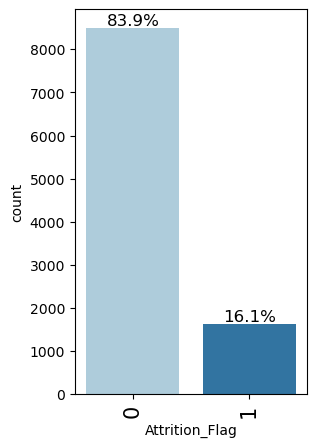

In [20]:
labeled_barplot(data, "Attrition_Flag", perc=True)

###Observation
As stated earlier, the dataset is imbalanced as only 16.1% customers have churned.

####Customer_Age

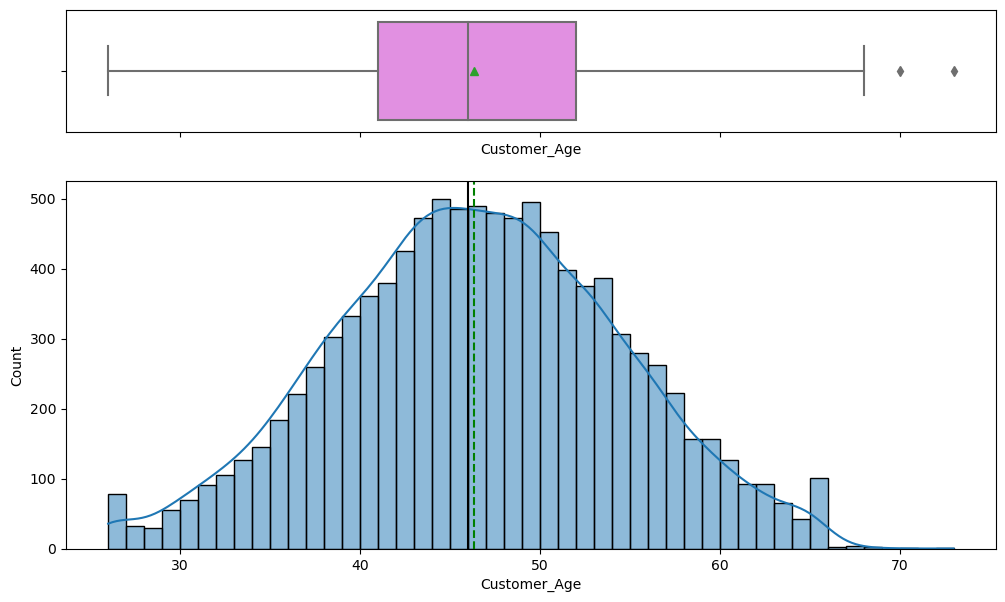

In [21]:
histogram_boxplot(data, "Customer_Age", kde=True)

In [22]:
outliers = create_outliers('Customer_Age', data)
outliers['Attrition_Flag'].value_counts()

0    2
Name: Attrition_Flag, dtype: int64

####Observations
- Customer_Age is uniformly distributed with the mean very close to median.
- There are two outliers but we will not treat them as they seem to reflect real world scenarios.

####Gender

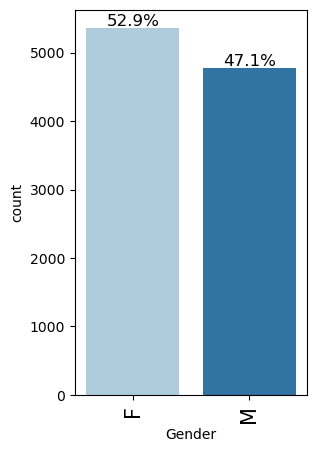

In [23]:
labeled_barplot(data, "Gender", perc=True)

####Observations
- As stated earlier, majority of customers - 52.9% are Female while 47.1% are Male.
- This indicates that Female customers are utlising more credit cards than Male customers.

####Dependent_count

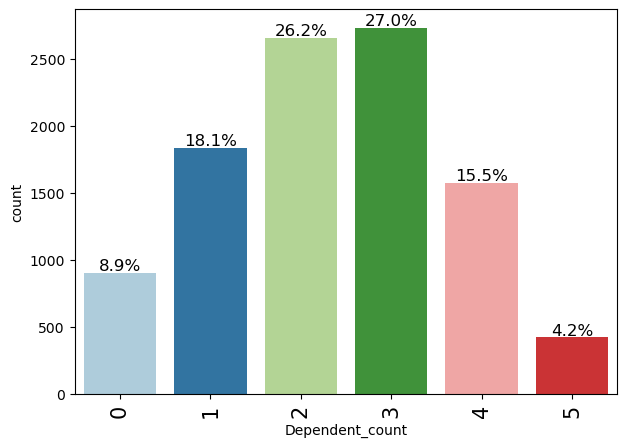

In [24]:
labeled_barplot(data, "Dependent_count", perc=True)

####Observation
Most customers have either 2 (26.2%) or 3 (27%) dependents on their credit card files.

####Education_Level

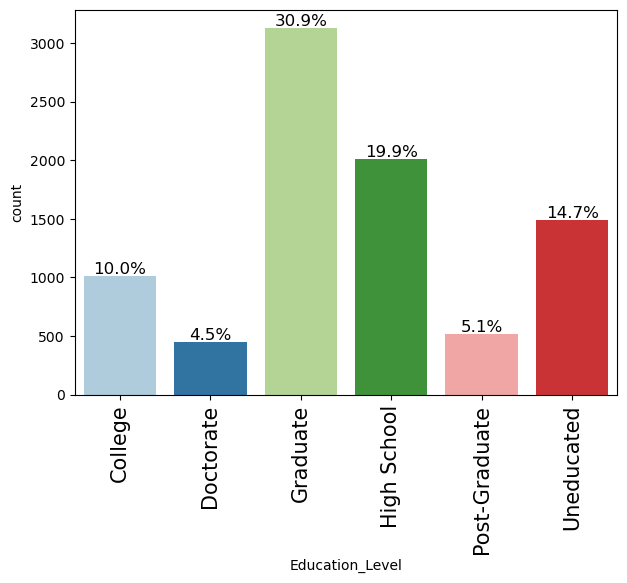

In [25]:
labeled_barplot(data, "Education_Level", perc=True)

####Observations
- 30.9% customers who use credit cards have a Graduate degree.
- 19.9% customers are high school gradudates.
- 14.7% customers have no formal education, it would be interesting to see their credit card usage patterns.

####Marital_Status

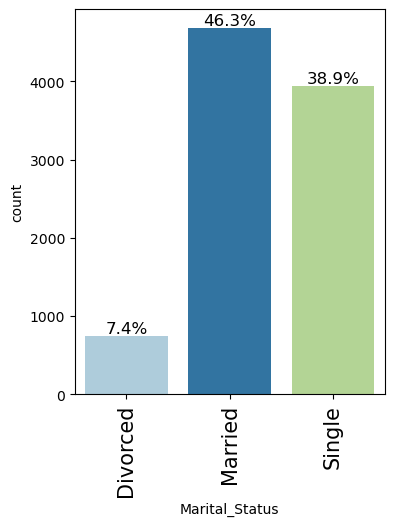

In [26]:
labeled_barplot(data, "Marital_Status", perc=True)

####Observation
46.3% customers are married, 38.9% are single and a low 7.4% are divorced.

####Income_Category

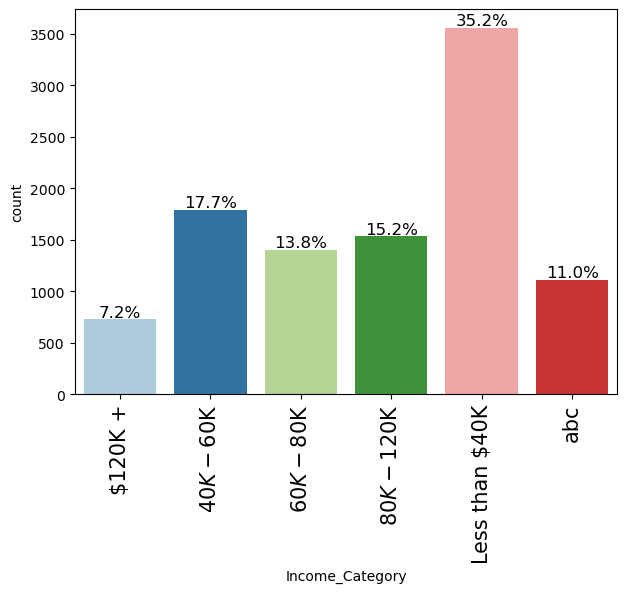

In [27]:
labeled_barplot(data, "Income_Category", perc=True)

####Observation
As stated earlier, majority of customers earn less than \$40K and we need to treat the unexpected 'abc' values.

####Card_Category

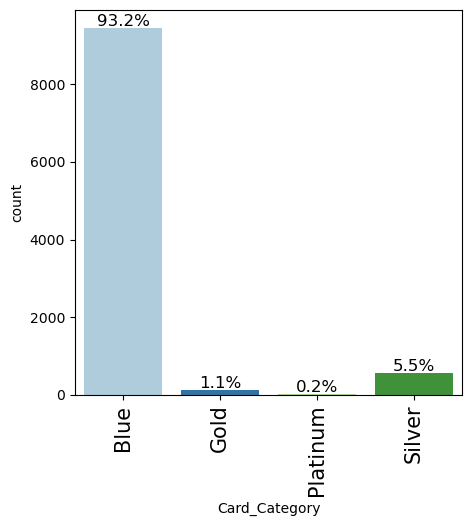

In [28]:
labeled_barplot(data, "Card_Category", perc=True)

####Observations
- An overwhelming majority of customers (93.2%) have the Blue credit card, followed by Silver, Gold and Platinum.
- There is a lot of upsell opportunity to higher card tiers.

####Months_on_book

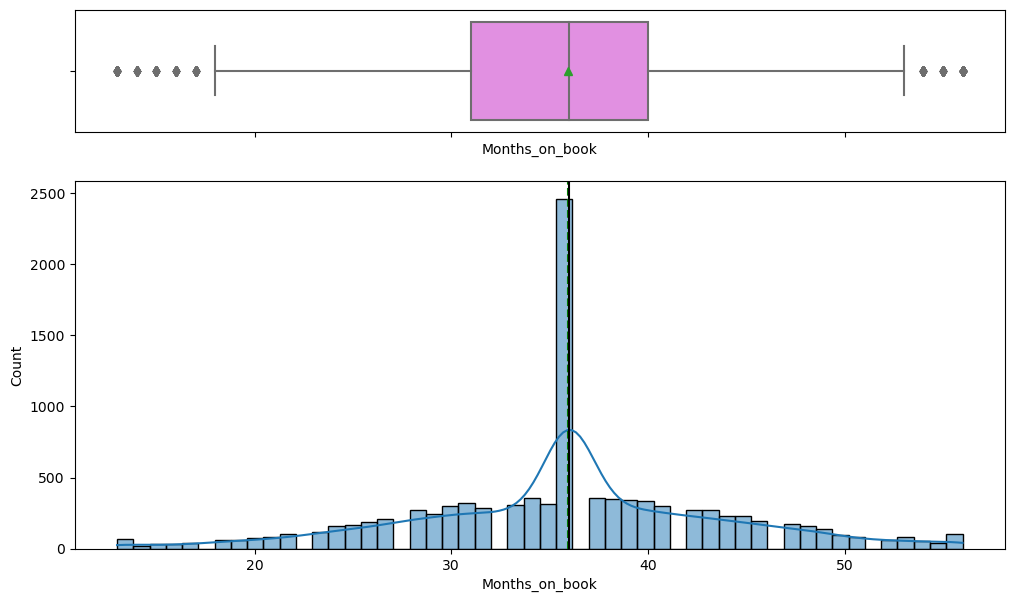

In [29]:
histogram_boxplot(data, "Months_on_book", kde=True)

In [30]:
outliers = create_outliers('Months_on_book', data)
outliers['Attrition_Flag'].value_counts()

0    335
1     51
Name: Attrition_Flag, dtype: int64

####Observations
- Most customers have been with the bank for a period of 30 to 40 months, with a peak at around 36 months.
- The distribution is approximately normal, but slightly skewed to the right.
- There are 386 outlier records but 51 of those customer have churned so we will not do outlier treatment here.

####Total_Relationship_Count

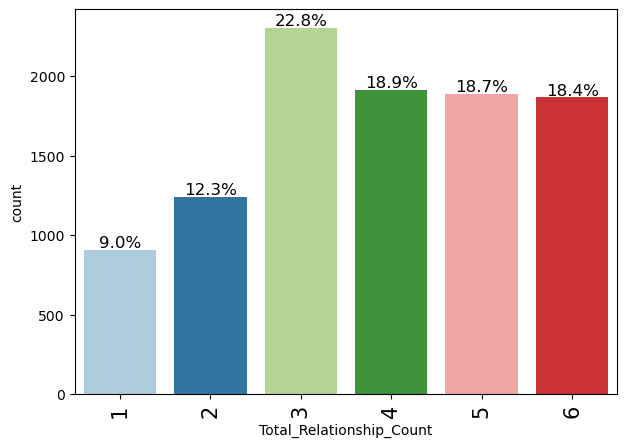

In [31]:
labeled_barplot(data, "Total_Relationship_Count", perc=True)

####Observation
Most customers have 3 or more products.

####Months_Inactive_12_mon

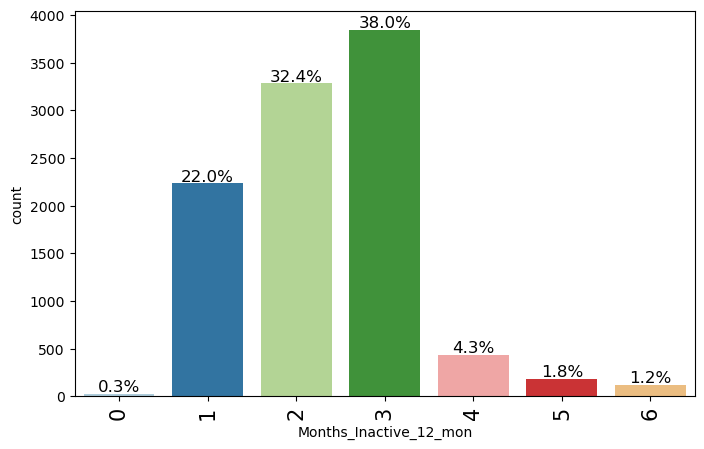

In [32]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True)

####Observations
- Most customers (38%) were inactive for 3 months in the past 12 months.
- Many customers were inactive for 1 or 2 months vs very few were inactive for longer periods of time (4-6 months).
- Only 0.3% customers were active every month in the past year.

####Contacts_Count_12_mon

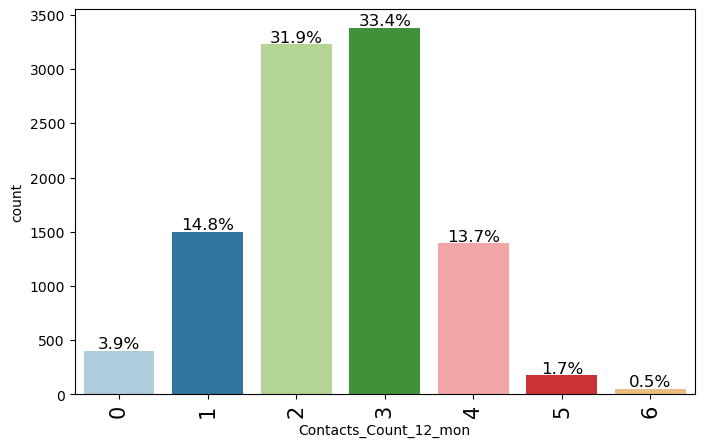

In [33]:
labeled_barplot(data, "Contacts_Count_12_mon", perc=True)

####Observations
- Most customers have had 3 contacts between the customer and bank in the last 12 months.
- 51% of customers have had atleast 1 contact with the bank in the past year.

####Credit_Limit

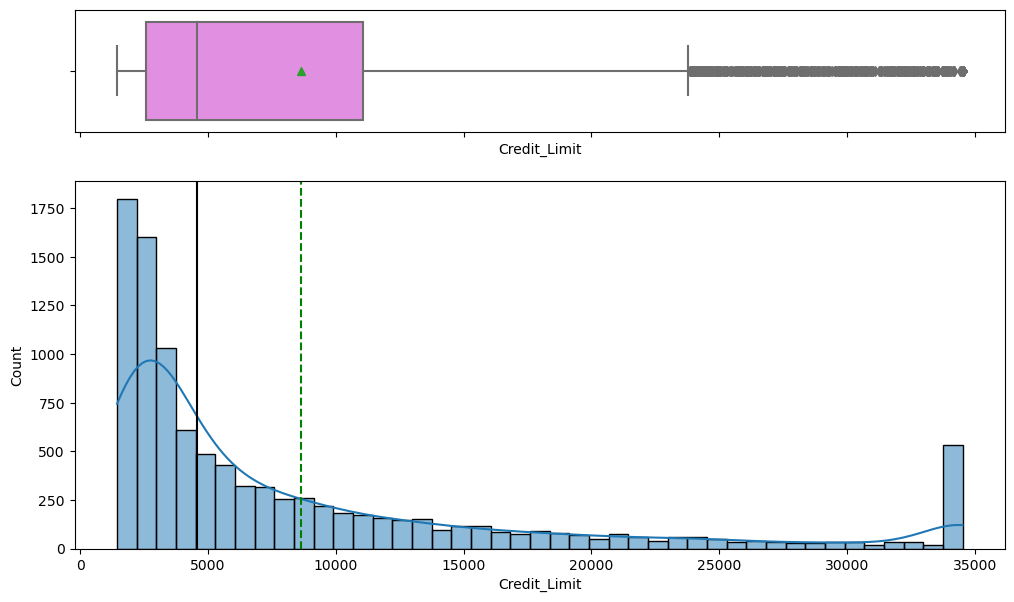

In [34]:
histogram_boxplot(data, "Credit_Limit", kde=True)

In [35]:
outliers = create_outliers('Credit_Limit', data)
outliers['Attrition_Flag'].value_counts()

0    826
1    158
Name: Attrition_Flag, dtype: int64

####Observations
- The distribution of the credit limit amount is right-skewed.
- The boxplot shows that there are outliers at the right end. We will not treat these outliers as some of them have churned.

####Total_Revolving_Bal

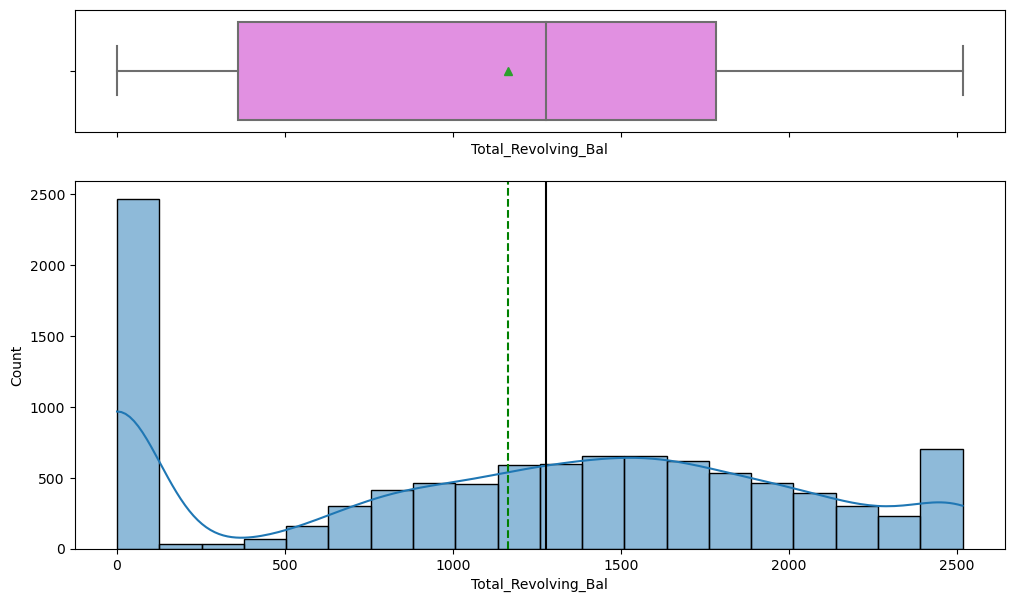

In [36]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

####Observations
- Many customers do not have a revolving balance. 
- A few customers have <\$500 revolving balance and about 700 customers have a high \$2500 revolving balance.
- Otherwise, revolving balance has a nearly normal distribution. Mean and median is around \$1200.
- There are no outliers.

####Avg_Open_To_Buy

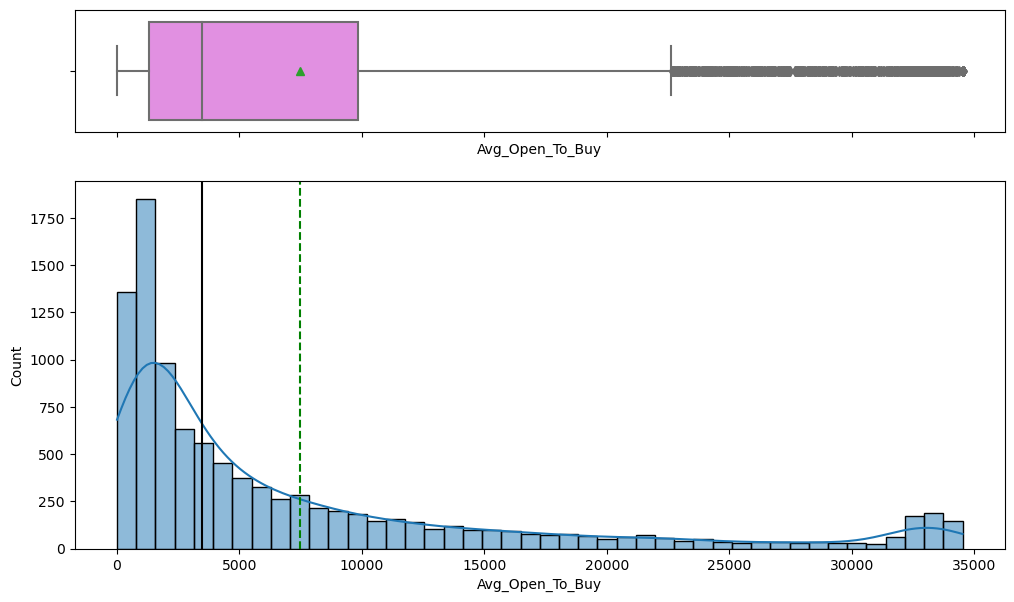

In [37]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

In [38]:
outliers = create_outliers('Avg_Open_To_Buy', data)
outliers['Attrition_Flag'].value_counts()

0    801
1    162
Name: Attrition_Flag, dtype: int64

####Observations
- The distribution of Open to Buy Credit Line is right-skewed. Most customers are buying till credit limit.
- There are many outliers at the right end which means there are many customers are not exhausting their credit limits. 
- We will not treat these outliers as some of them have churned and this represents real world scenarios.

####Total_Amt_Chng_Q4_Q1

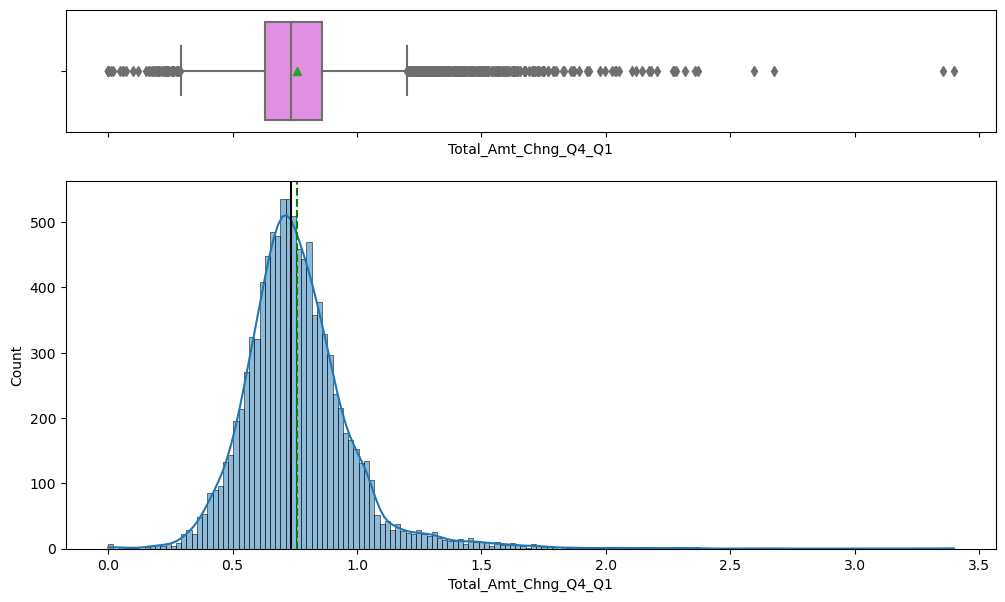

In [39]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)

In [40]:
outliers = create_outliers('Total_Amt_Chng_Q4_Q1', data)
outliers['Attrition_Flag'].value_counts()

0    346
1     50
Name: Attrition_Flag, dtype: int64

####Observations
- The distribution of Total_Amt_Chng_Q4_Q1 is right-skewed. 
- There are many outliers at both ends. 
- We will not treat these outliers as some of them have churned and this represents real world scenarios.

####Total_Trans_Amt

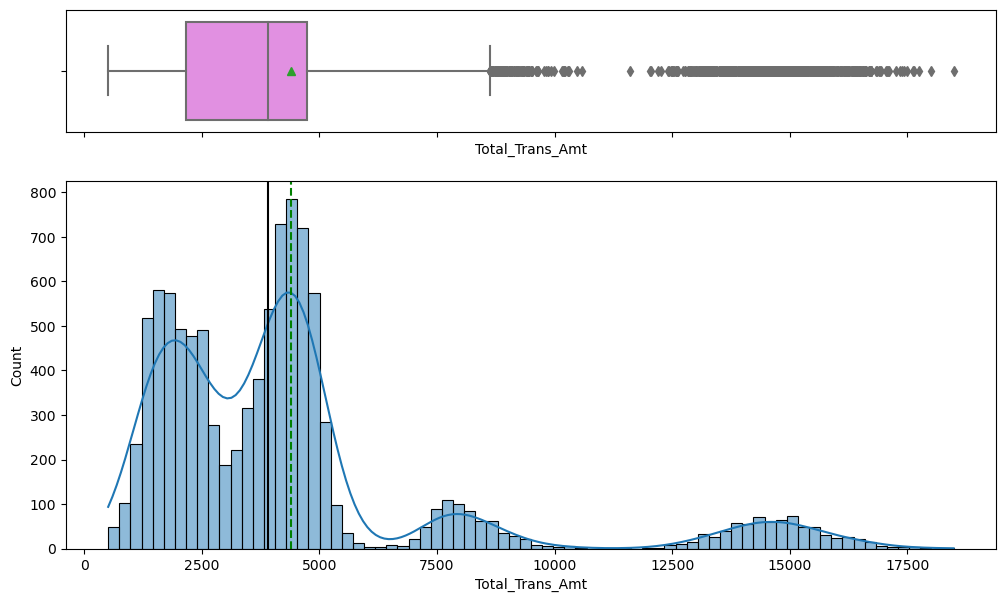

In [41]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

In [42]:
outliers = create_outliers('Total_Trans_Amt', data)
outliers['Attrition_Flag'].value_counts()

0    808
1     88
Name: Attrition_Flag, dtype: int64

####Observations
- The distribution of Total_Trans_Amt is right-skewed. 
- There are many outliers at the right end which means there are many heavyweight purchases happening on the cards.
- We will not treat these outliers as some of them have churned and this represents real world scenarios.

####Total_Trans_Ct

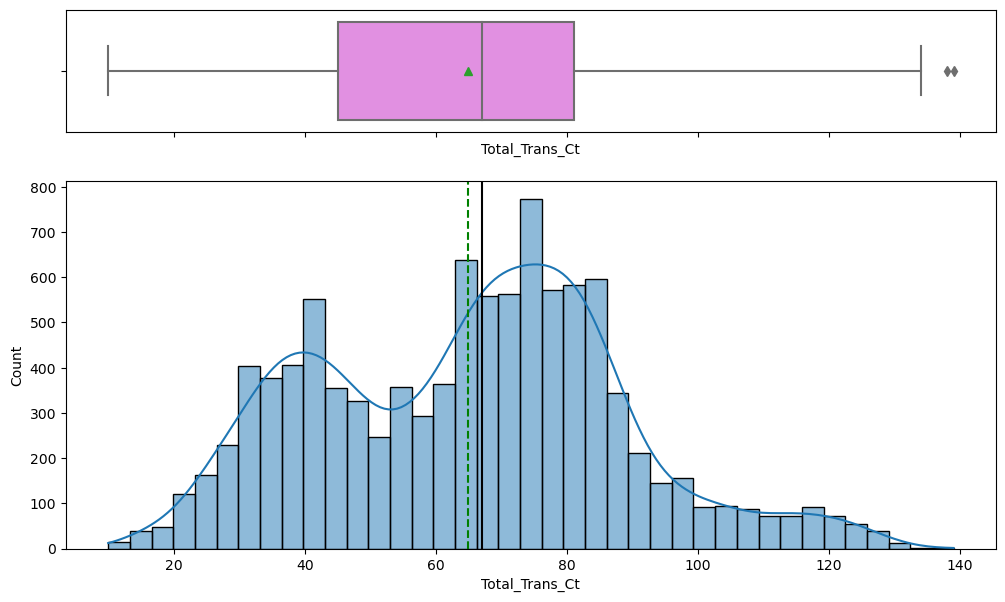

In [43]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

####Observations
- The distribution of Total_Trans_Ct has two local maxima. 
- Most customers have done 60-80 transactions on the cards in the last 12 months.
- There are a few outliers at the right end which indicates high transaction counts.
- We will not treat these outliers as this represents real world scenarios.

####Total_Ct_Chng_Q4_Q1

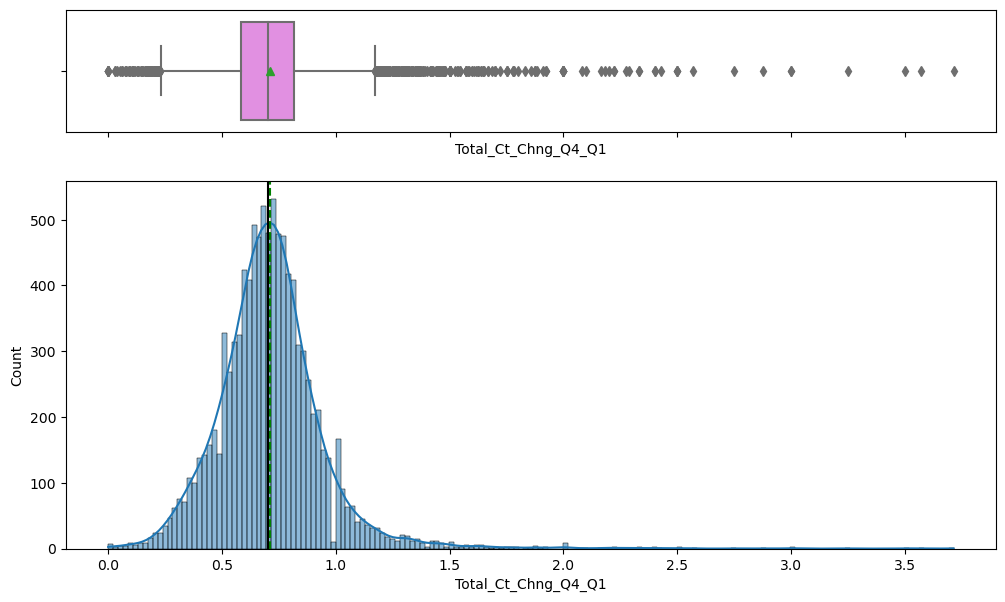

In [44]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

In [45]:
outliers = create_outliers('Total_Ct_Chng_Q4_Q1', data)
outliers['Attrition_Flag'].value_counts()

0    307
1     87
Name: Attrition_Flag, dtype: int64

####Observations
- The distribution of Total_Ct_Chng_Q4_Q1 is right-skewed. 
- There are many outliers at both ends. 
- We will not treat these outliers as some of them have churned and this represents real world scenarios.

####Avg_Utilization_Ratio

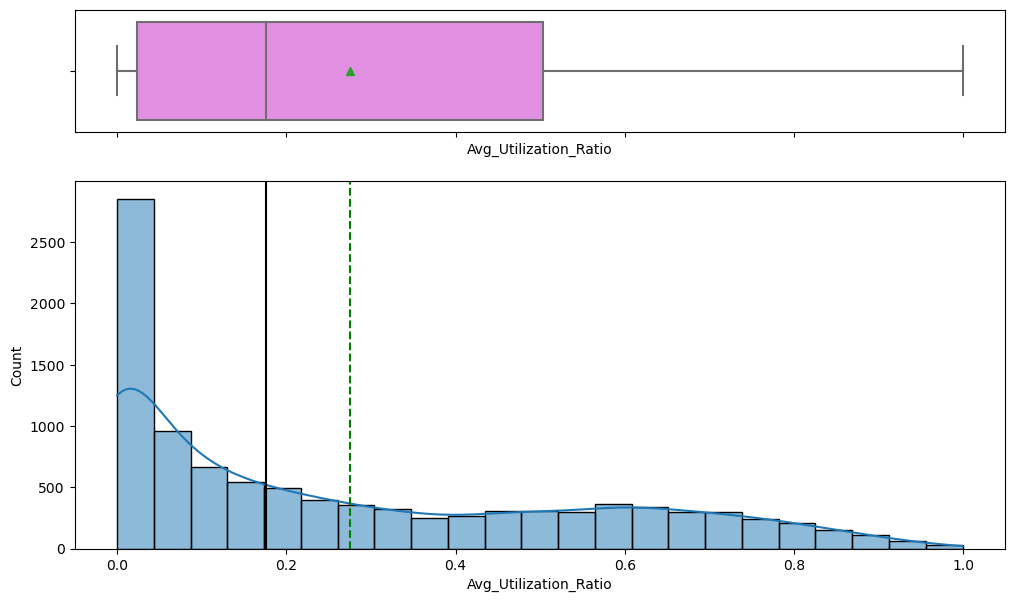

In [46]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)

####Observations
- The distribution of Avg_Utilization_Ratio is right-skewed. 
- Many customers have no utilization, average utlilization ratio is about 30% and very few have 100% utilization,
- There are no outliers.

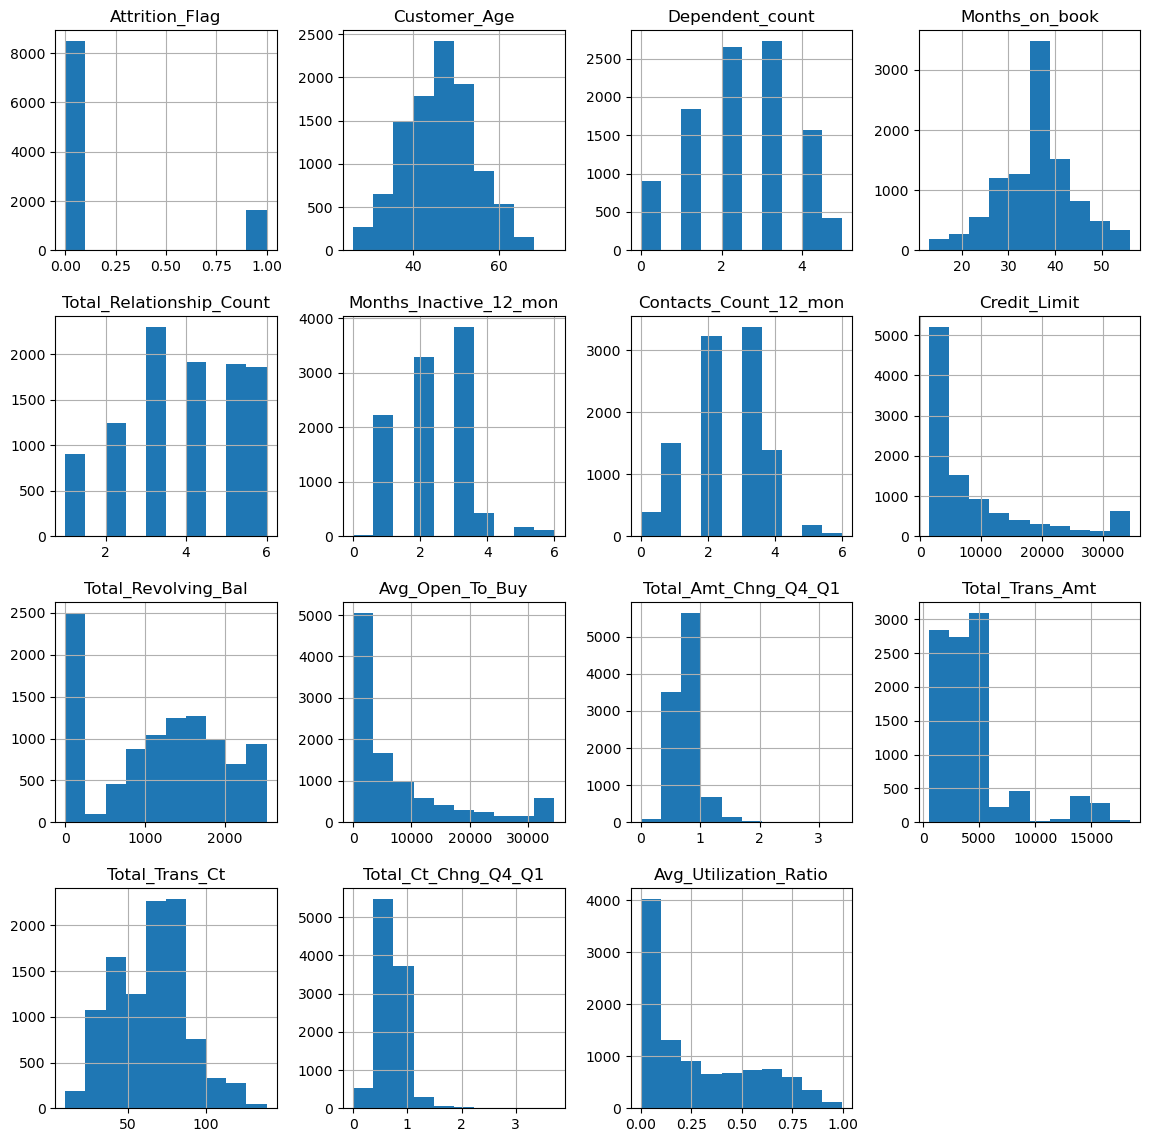

In [47]:
data.hist(figsize=(14, 14))
plt.show()

###Bivariate Analysis

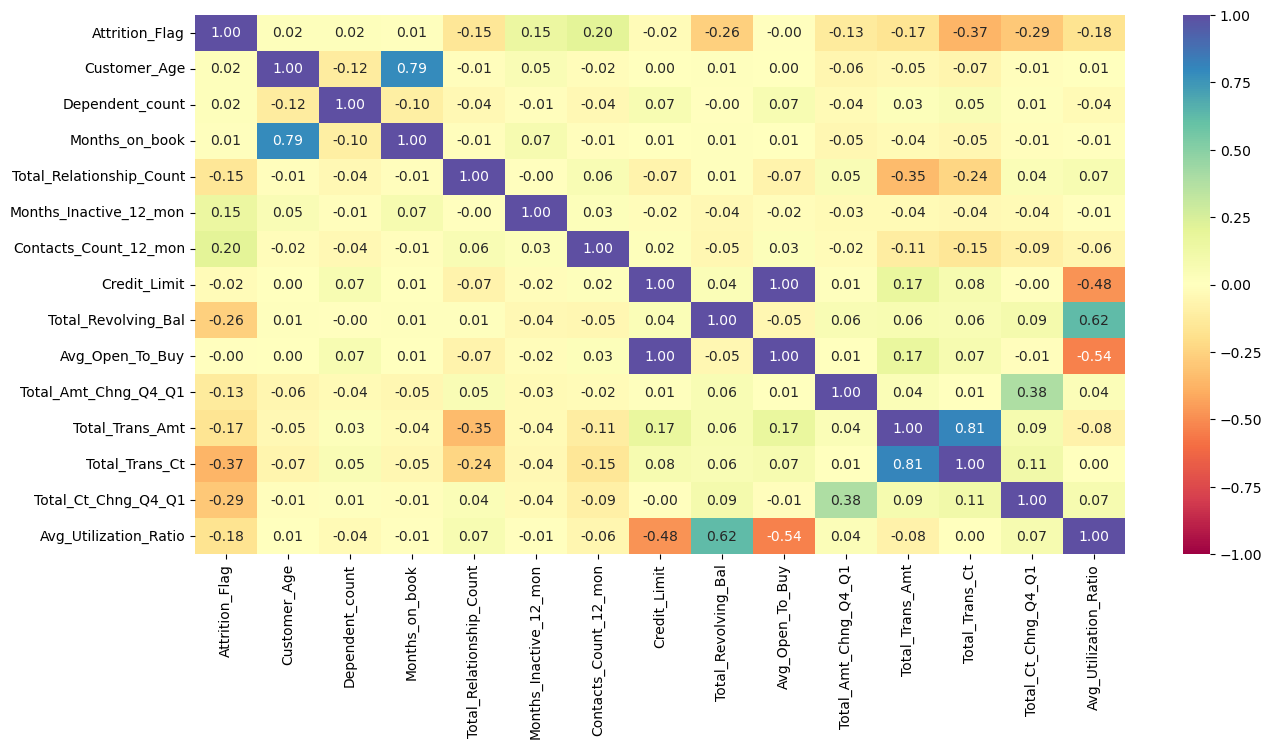

In [48]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####Observations
- Churned customers seem to have lower amounts for: Total Transaction Amount (Last 12 months), Total Transaction Count (Last 12 months), Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter, Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter.
- Avg_open_to_buy and credit_limit have a perfect correlation which makes sense as they go hand in hand. More the credit limit, more room their is for purchases on a credit card.
- Total_Trans_Ct is highly correlated with Total_Trans_Amt which makes sense since both are related to the transactions of the credit card holder.
- Months_on_book is correlated with Customer_Age which makes  sense since older customers would have more time on the bank's books.
- Avg_Utilization_Ratio has a correlation with Total_Revolving_Bal which makes sense since high utilization could indicate higher revolving balance.
- Avg_open_to_buy and avg_utilization_ratio have a moderate negative correlation which makes sense as you use your credit card more, there is less room to spend.
- Credit limit and utilization ratio have a moderate negative correlation which makes sense because if your income increases, increasing your credit limit but your expenses remains fairly the same, the utilization ratio will decrease.

####Attrition_Flag vs Customer_Age

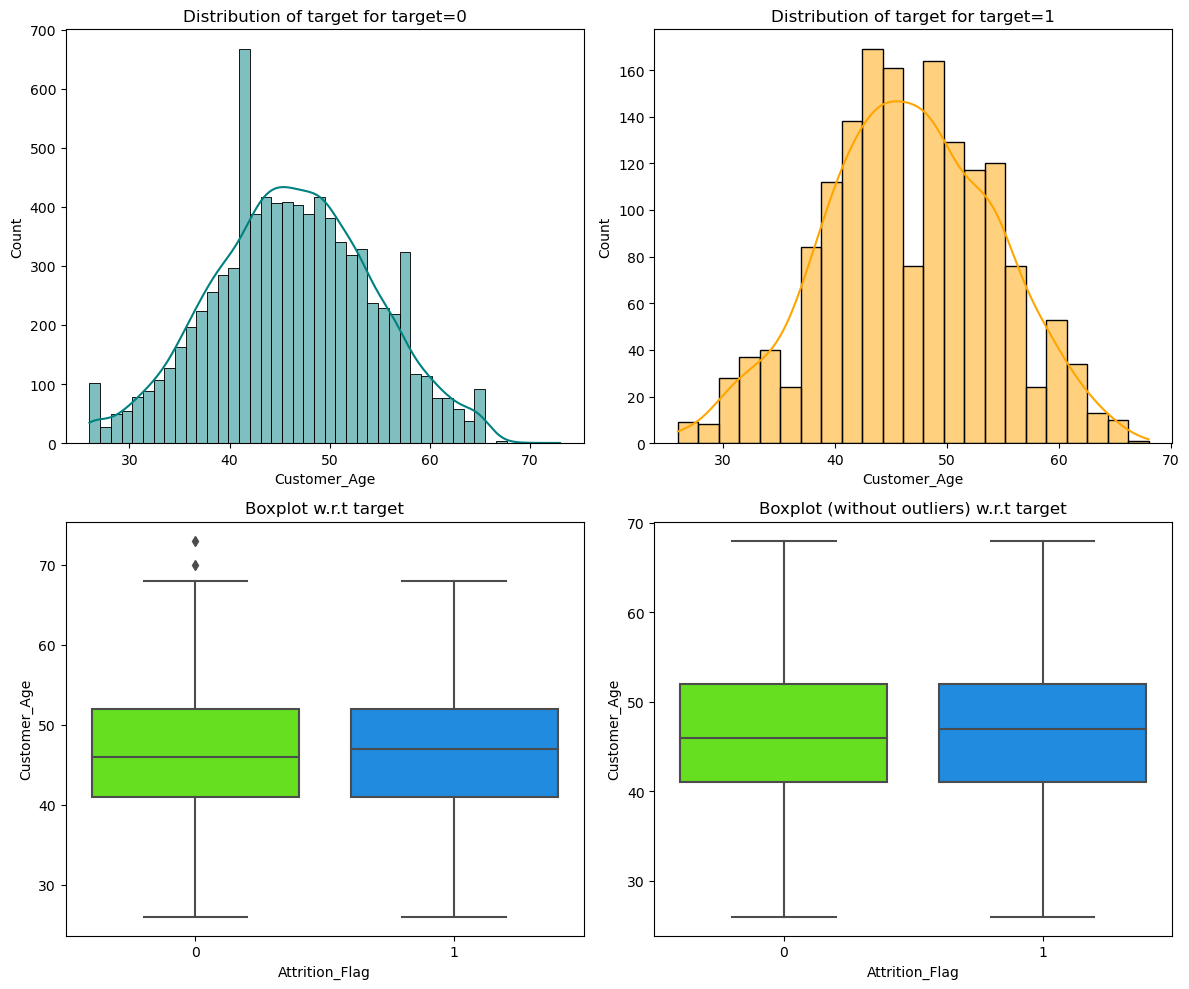

In [49]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

####Observations
- Median age of churned customers is higher than the median age of existing customers.
- This indicates that the bank is more likely to retain younger customers.
- There are some outliers in boxplot of only existing customers

####Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


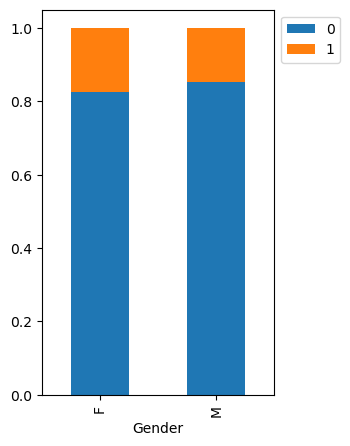

In [50]:
stacked_barplot(data, "Gender", "Attrition_Flag")

####Observations
- The churn pattern is very similar between male and female customers
- Female customers have churned slightly more than males comparitively.

####Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


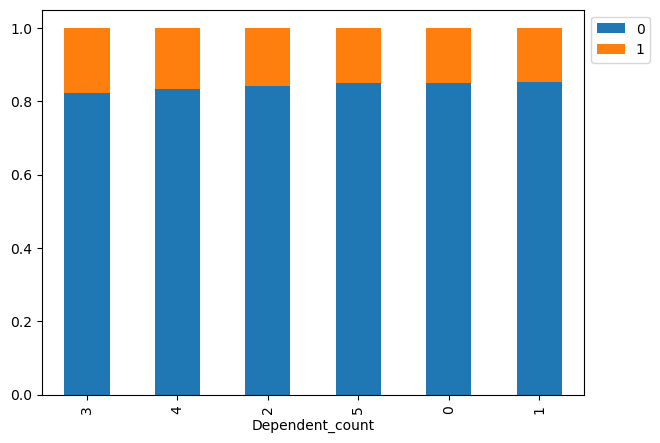

In [51]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

####Observation
Customers with 3 or 4 dependents have a slightly higher chance of attrition than others.

####Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


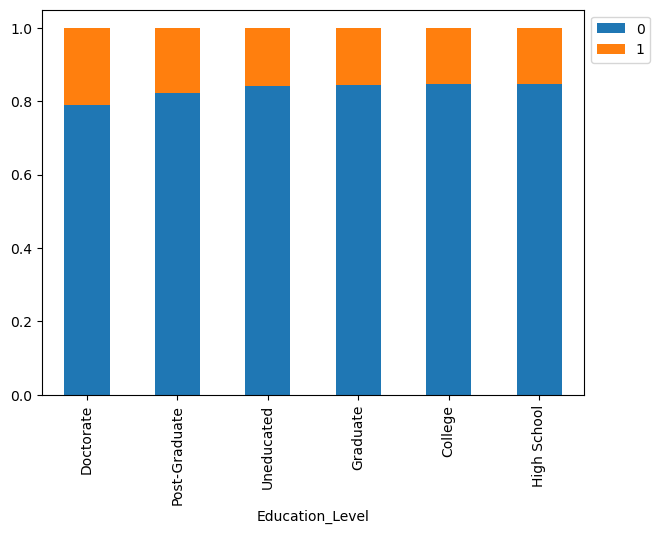

In [52]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

####Observation
Customers with post-graduate or doctorate education levels have a higher chance of attrition than others.

####Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


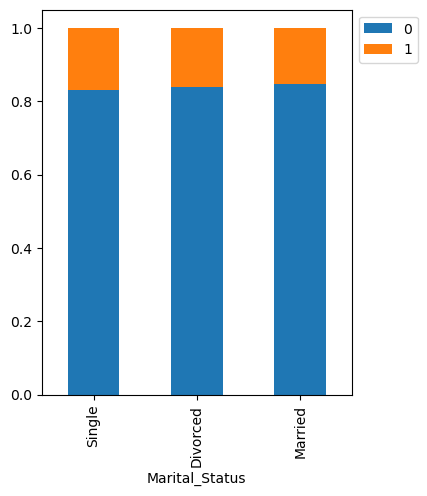

In [53]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

####Observation
Customers who are single or divorced have a higher chance of attrition than married customers.

####Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


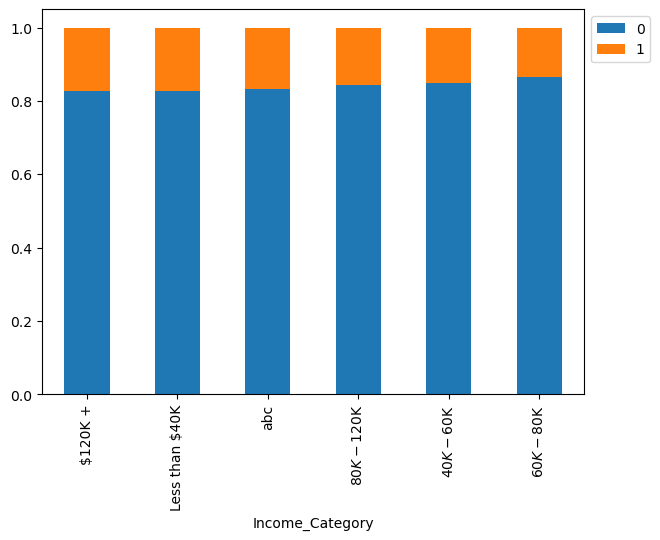

In [54]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

####Observation
Customers with either very high incomes or very low incomes have a higher chance of attrition than others.

####Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


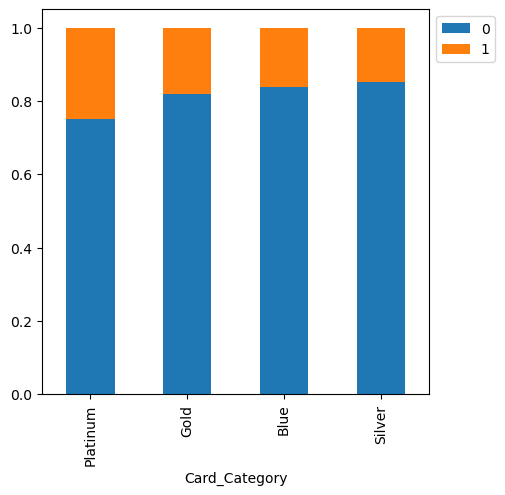

In [55]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

####Observation
Customers with Platinum cards have a much higher chance of attrition than others. Maybe this card tier is not very appealing.

####Attrition_Flag vs Months_on_book

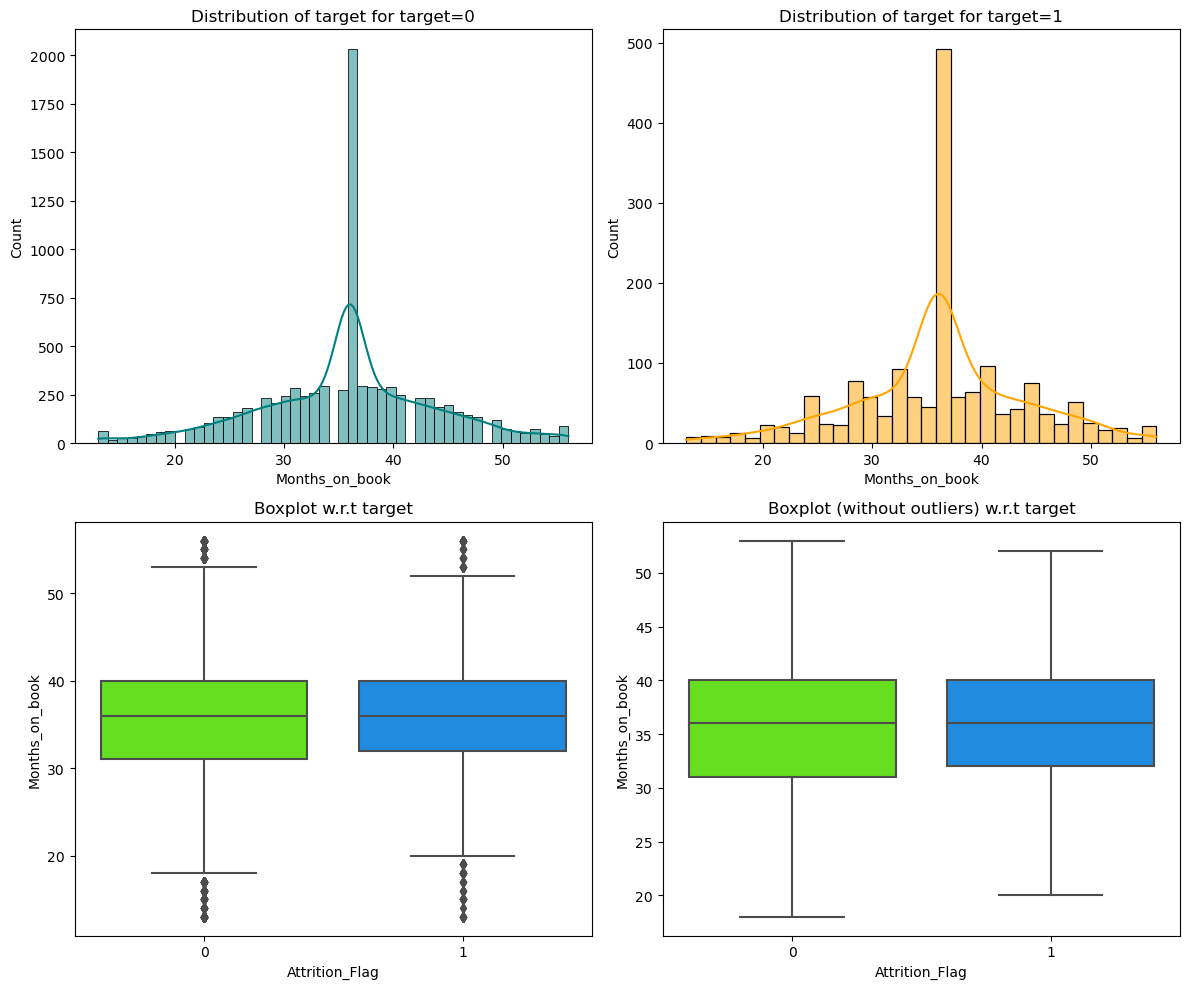

In [56]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

####Observation
No significant difference observed in months_on_book between churned and existing customers.

####Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


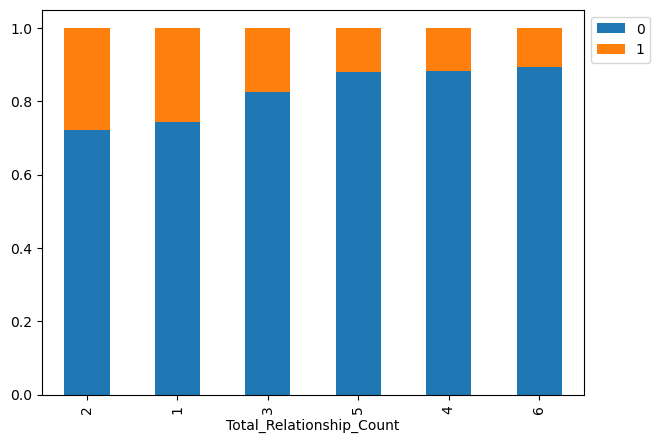

In [57]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

####Observation
Higher no. of products i.e. 3 or more significantly reduces churn risk.

####Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


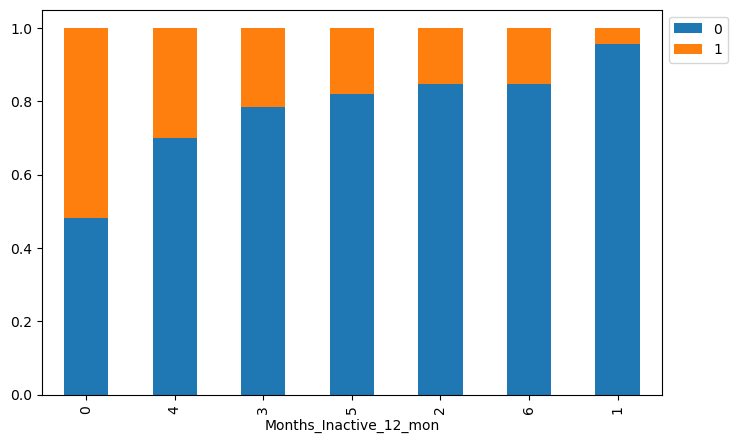

In [58]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

####Observations
- Equal no. of customers were retained or churned among those that were fully active last year.
- Customers on either extremes of inactivity i.e. 1-2 months or 5-6 months are less likely to churn.
- Customers with 3-4 months of inactivity are likely to churn.

####Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


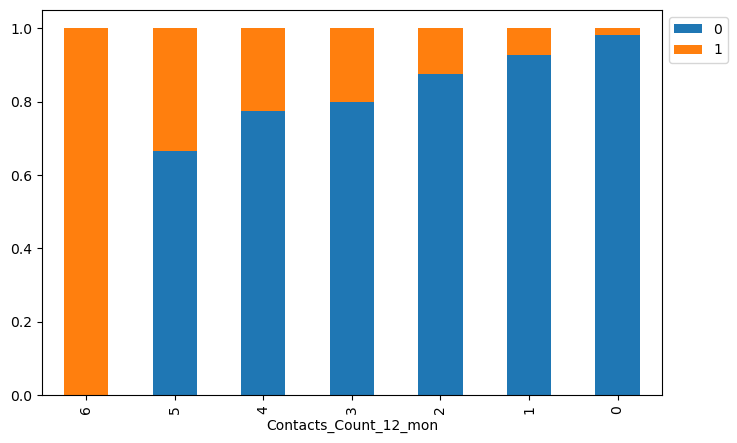

In [59]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

####Observation
More contact with the bank equals more churn risk. This can indicate more support calls and dissatisfaction with services.

####Attrition_Flag vs Credit_Limit

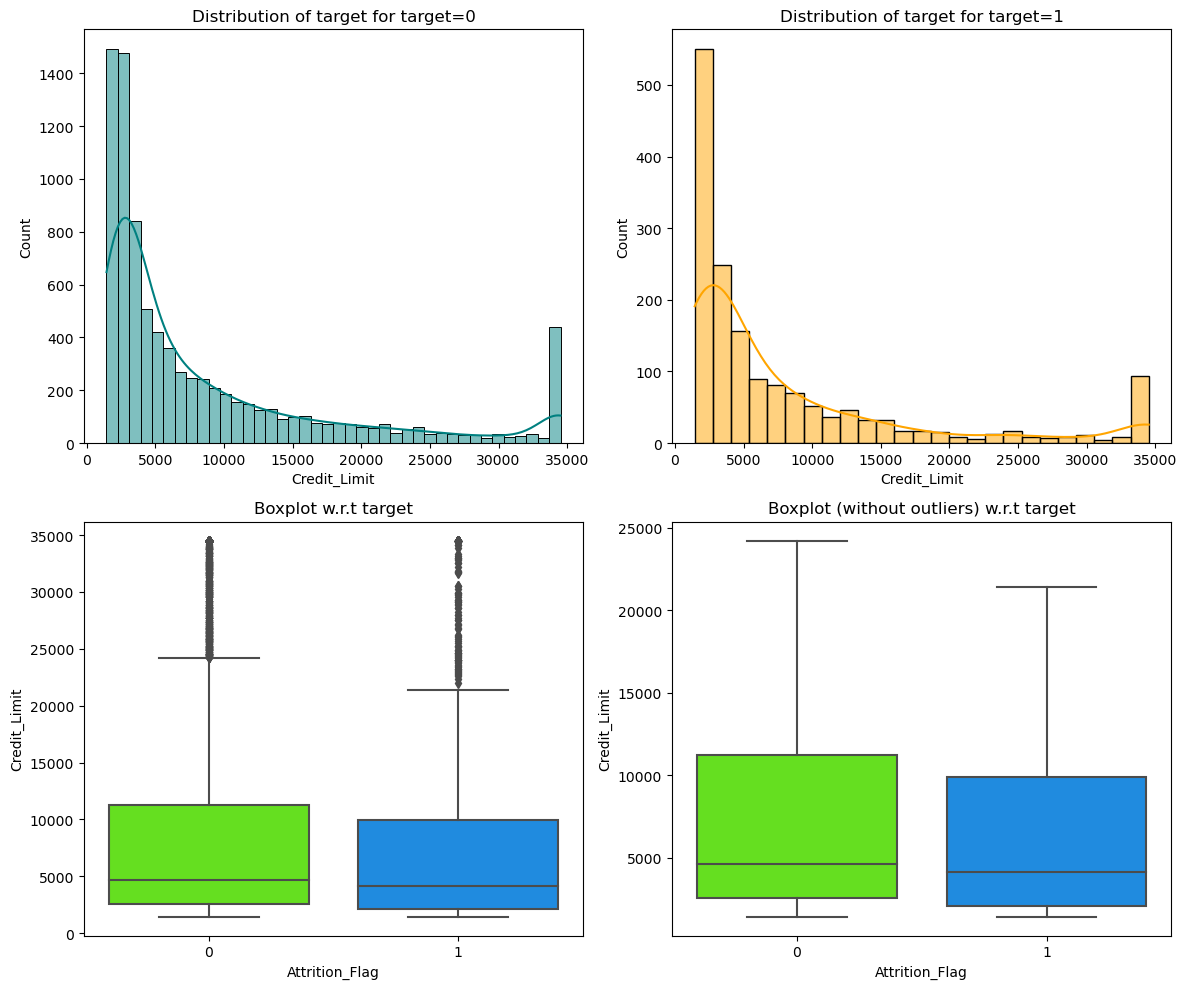

In [60]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

####Observations
- Churned customers on average had a lower credit limit.
- However there are many outliers in both cases of target variable.

####Attrition_Flag vs Total_Revolving_Bal

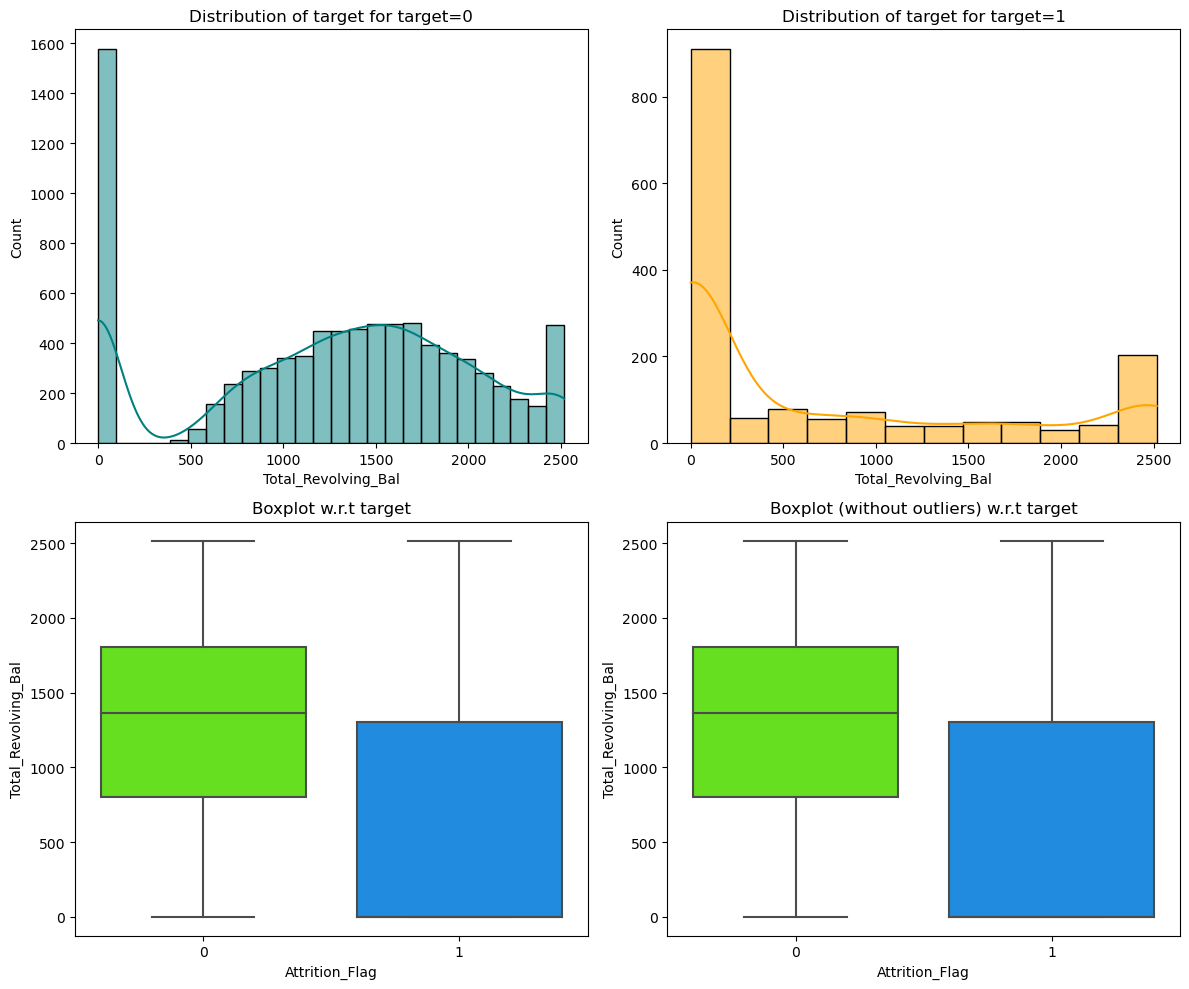

In [61]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

####Observation
Churned customers on average had a much lower, near-0 revolving balance, indicating lacking the need for a credit card.

####Attrition_Flag vs Avg_Open_To_Buy

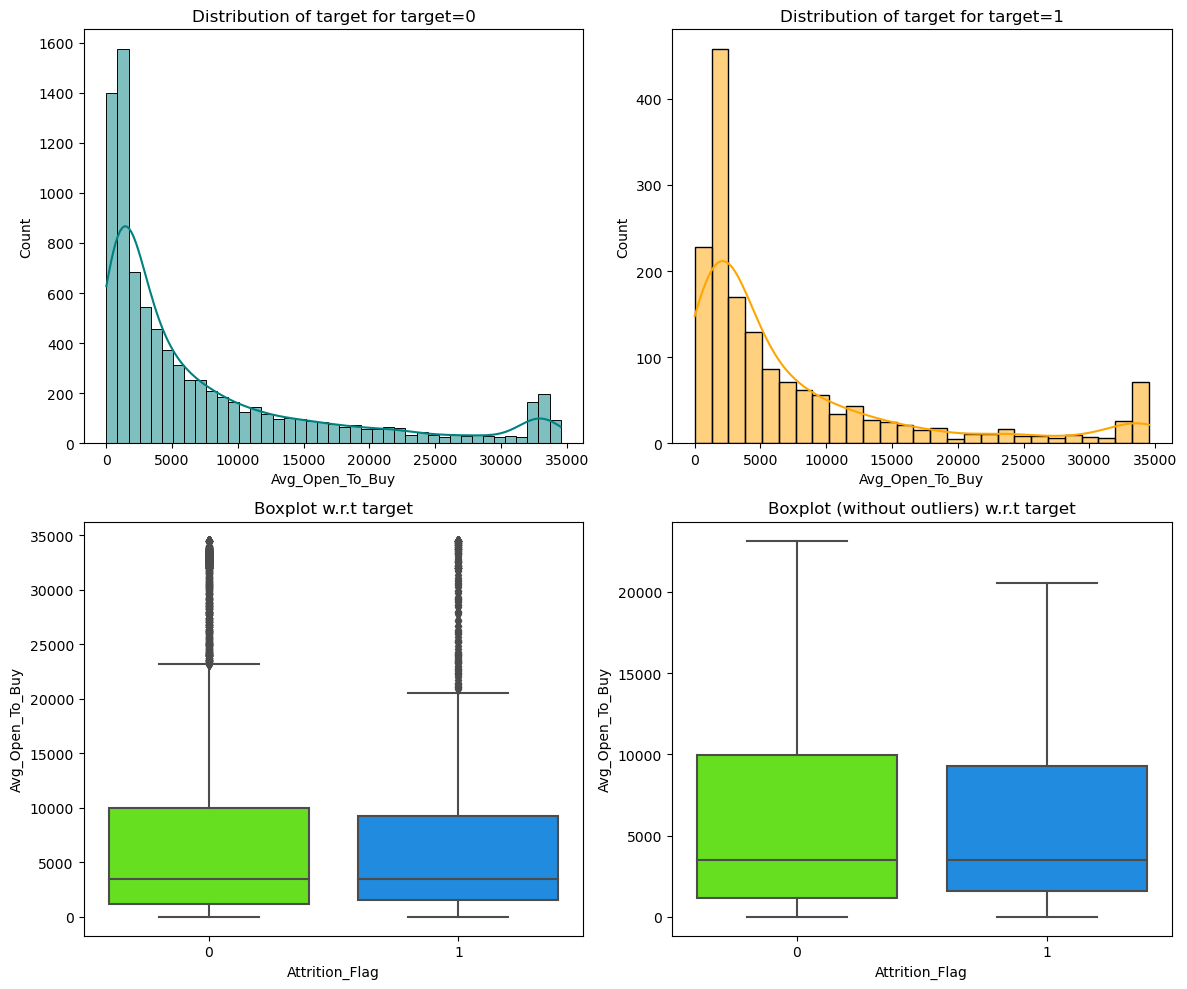

In [62]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

####Observations
- No significant difference in open_to_buy for existing and churned customers. 
- However there are many outliers in both cases of target variable.

####Attrition_Flag vs Total_Amt_Chng_Q4_Q1

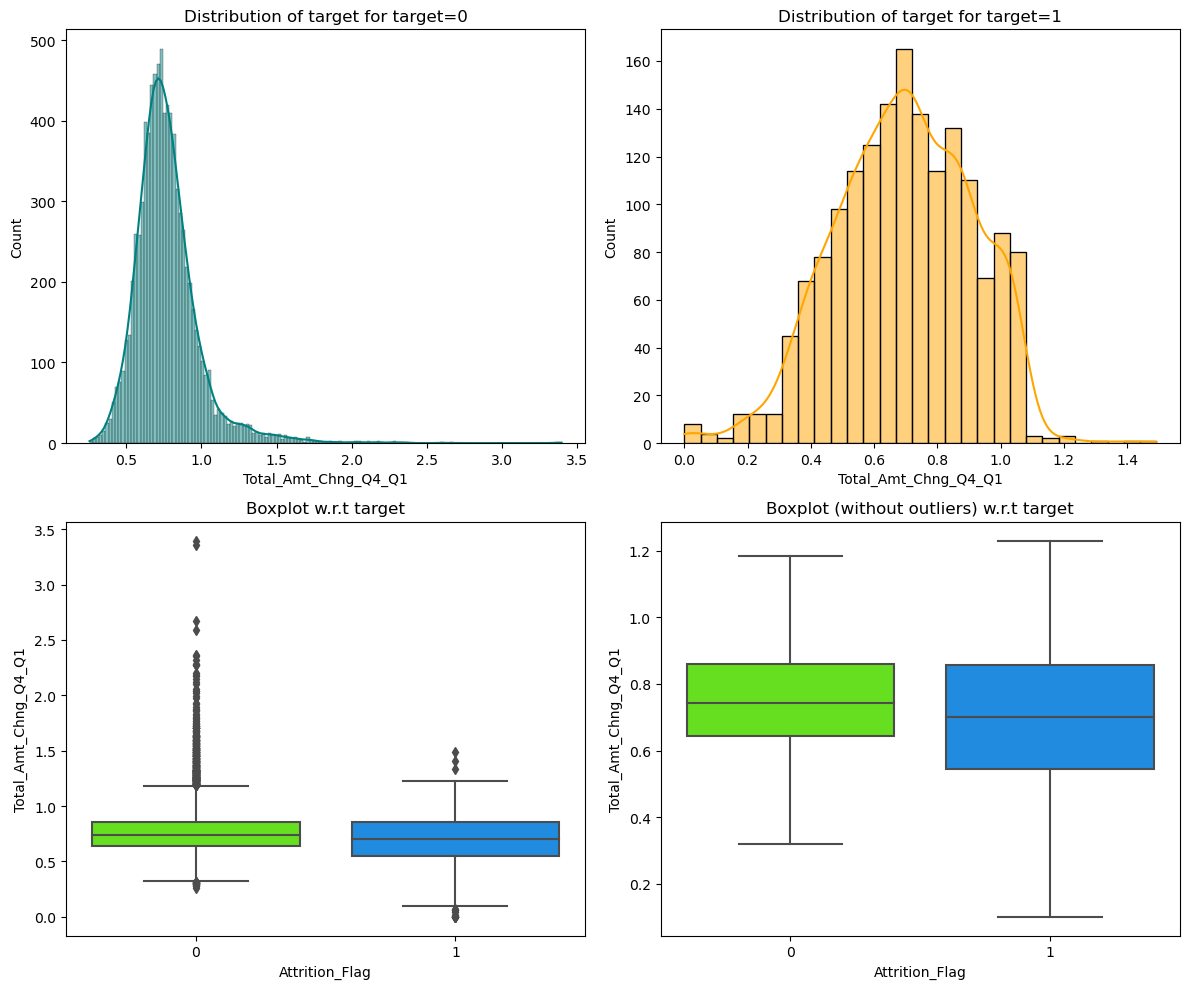

In [63]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

####Observations
- Churned customers had a lower total amount change in Q4 over Q1.
- However there are many outliers for existing customers.

####Attrition_Flag vs Total_Trans_Amt

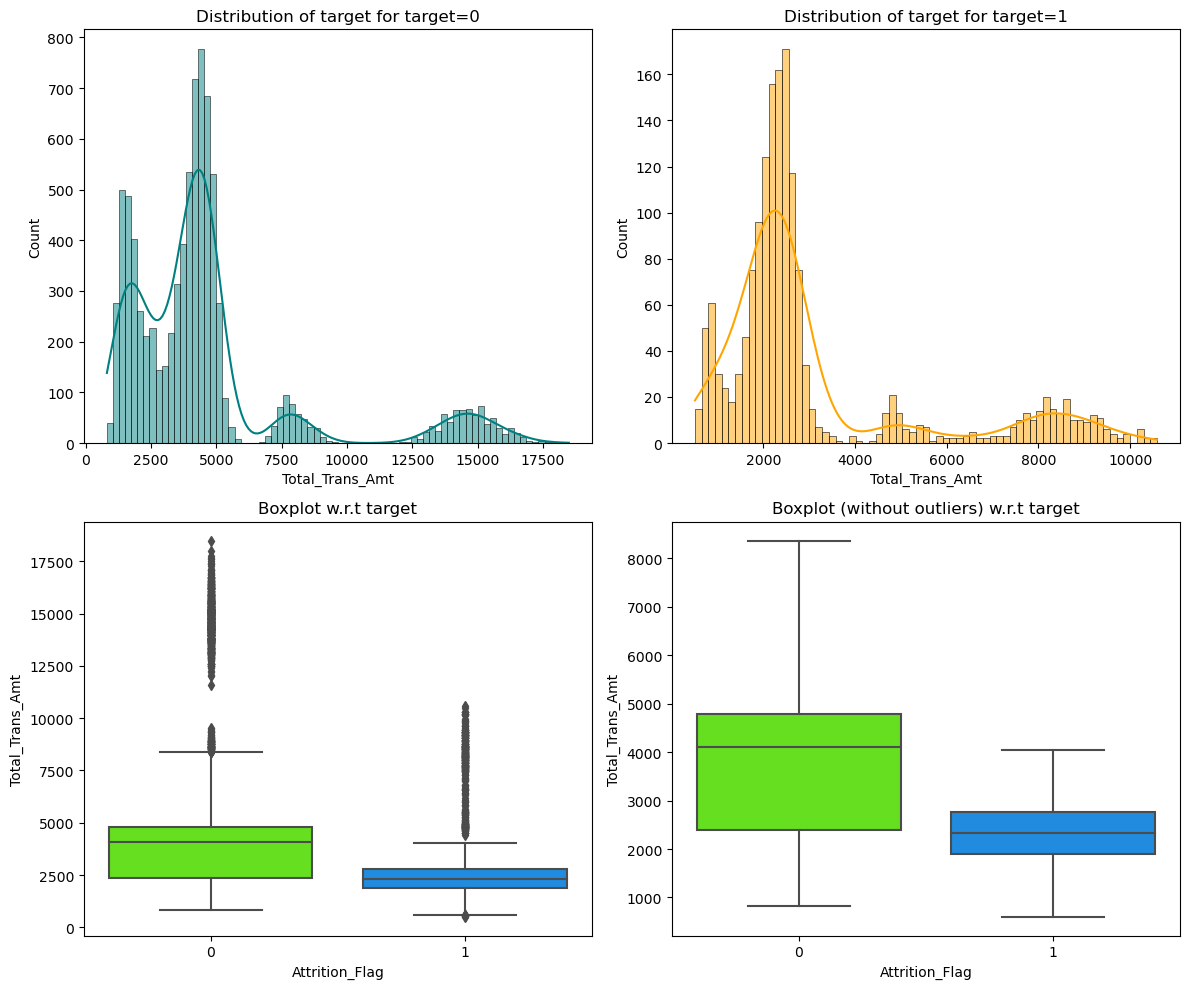

In [64]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

####Observations
- Churned customers had a lower total transaction amount.
- However there are many outliers for both churned and existing customers.

####Attrition_Flag vs Total_Trans_Ct

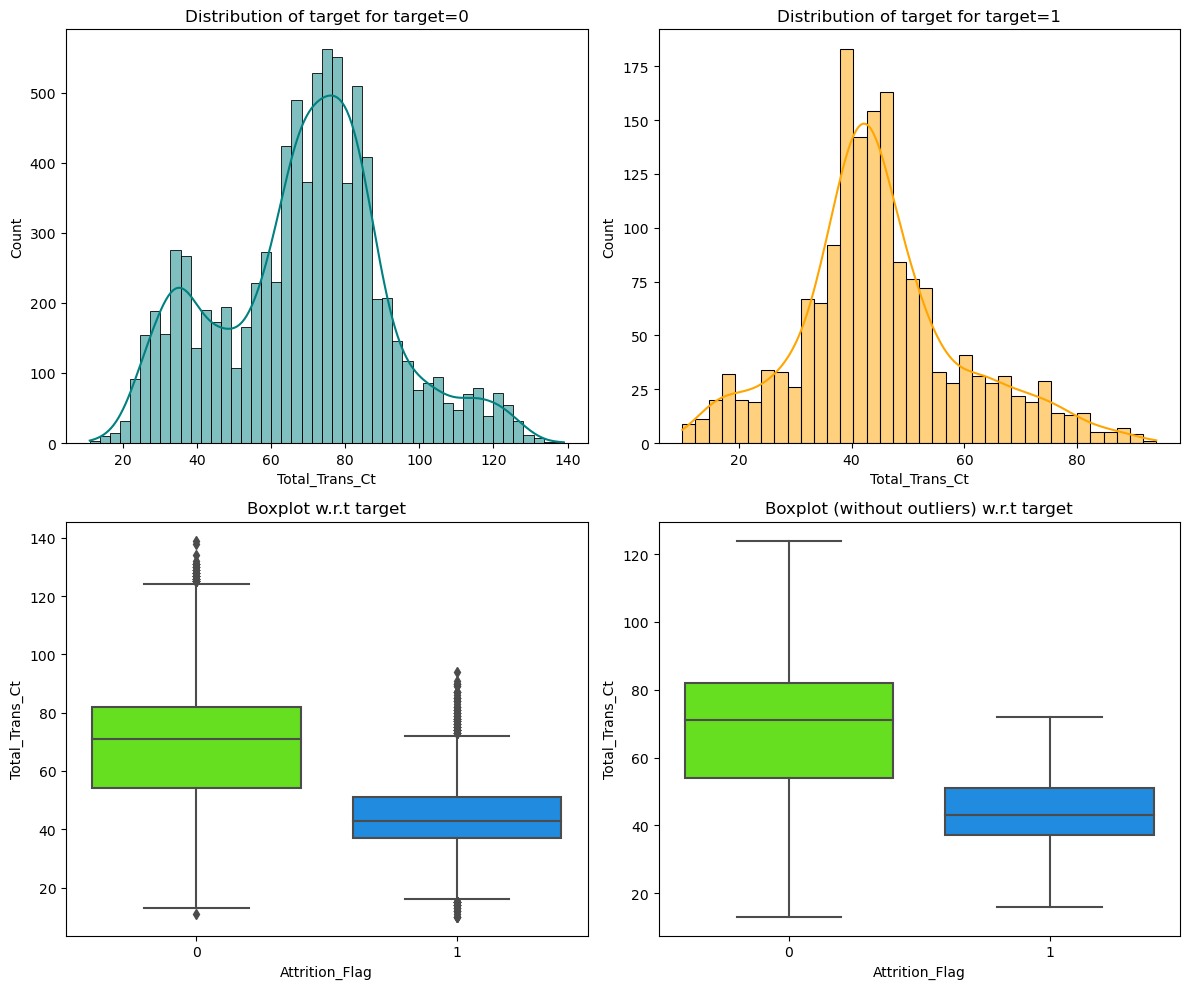

In [65]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

####Observations
- Churned customers had a lower total transaction count.
- However there are many outliers for both churned and existing customers.

####Attrition_Flag vs Total_Ct_Chng_Q4_Q1

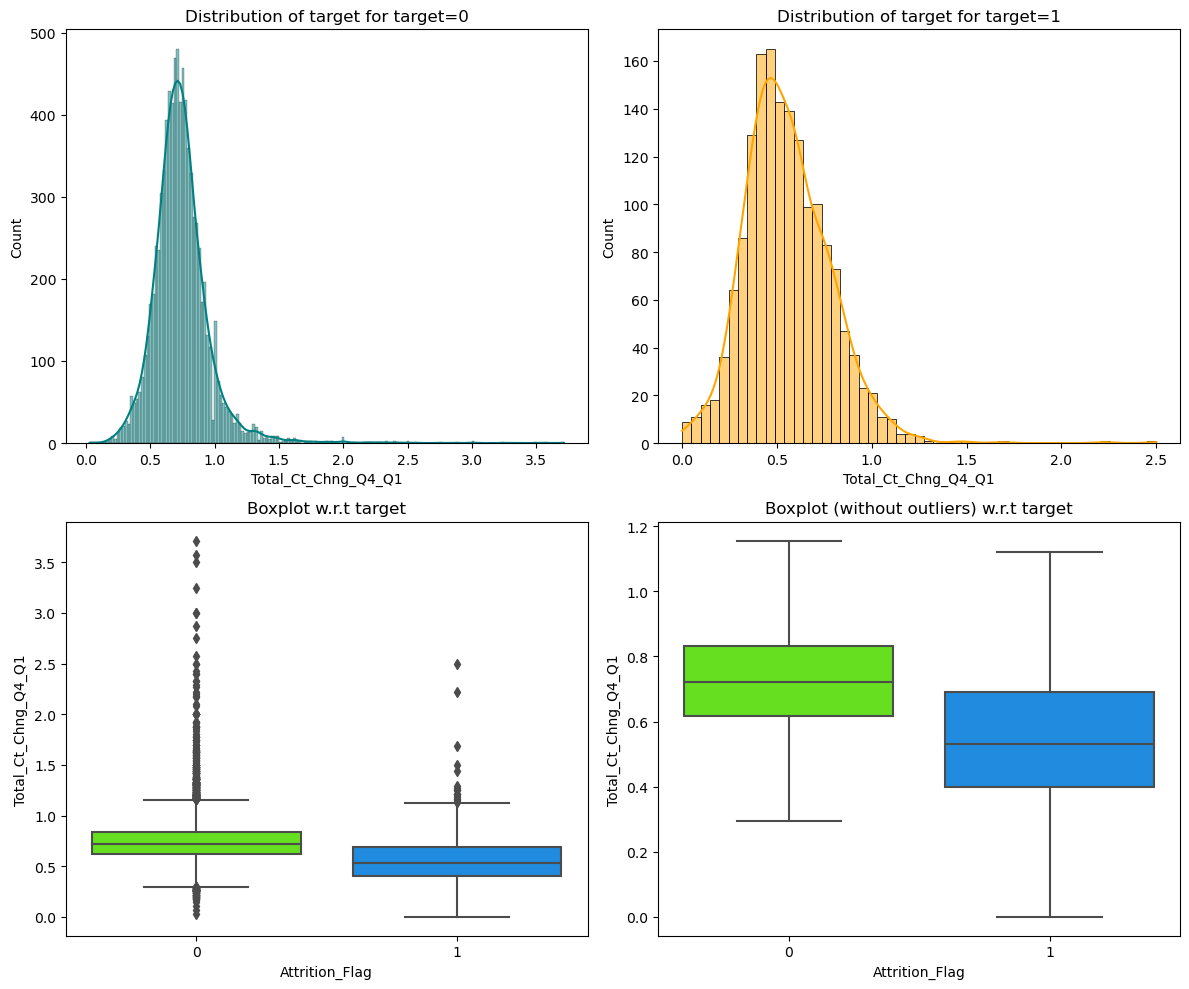

In [66]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

####Observations
- Churned customers had a lower total change in transaction count in Q4 over Q1.
- However there are many outliers for both churned and existing customers.

####Attrition_Flag vs Avg_Utilization_Ratio

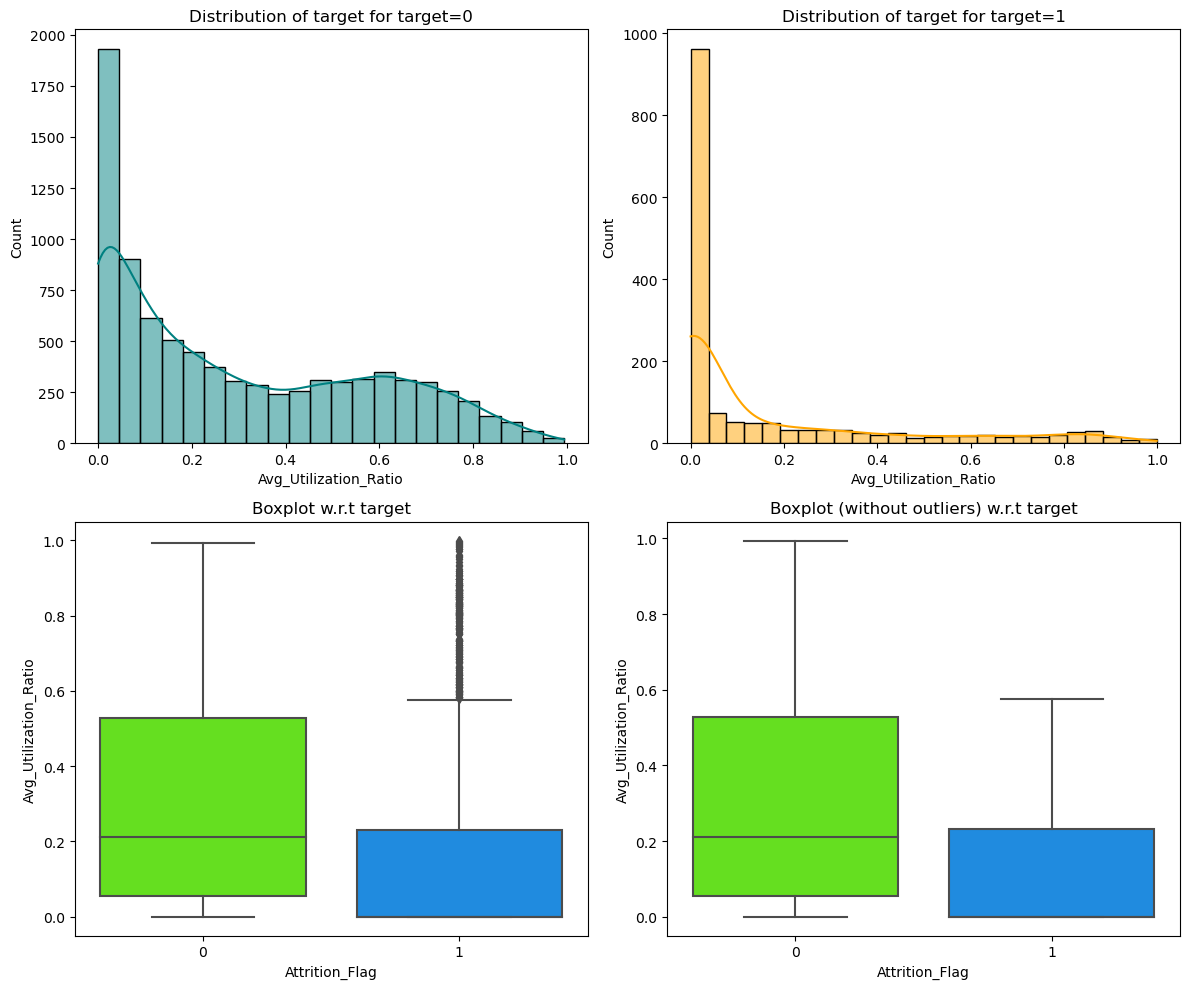

In [67]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

####Observations
- Churned customers had a lower average utilization ratio.
- However there are many outliers for both churned customers.

## Data Pre-processing

In [68]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [69]:
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

####Observation
As detailed earlier, we will not do outlier treatment as these records reflect real life scenarios. Some people make considerably more money than others, and some may contact the bank more frequently.

###Missing value imputation

In [70]:
data["Income_Category"].replace("abc", np.nan, inplace=True)

In [71]:
data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [72]:
# Creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [73]:
# Dividing training data into attributes and target variable

X = data.drop(["Attrition_Flag"], axis=1)
Y = data["Attrition_Flag"]

In [74]:
# Splitting data into training, test and validation sets before imputation to avoid data leakage

X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify=Y) 

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [75]:
impute_cols = ["Education_Level", "Marital_Status", "Income_Category"]

In [76]:
# Fit and transform the train data
X_train[impute_cols] = imputer.fit_transform(X_train[impute_cols])

# Transform the validation data
X_val[impute_cols] = imputer.fit_transform(X_val[impute_cols])

# Transform the test data
X_test[impute_cols] = imputer.fit_transform(X_test[impute_cols])

In [77]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [78]:
# Creating dummy variables for each split
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [79]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000,1602,18454.000,0.466,1687,46,0.533,0.080,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
498,44,1,34,6,2,0,2885.000,1895,990.000,0.387,1366,31,0.632,0.657,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4356,48,4,36,5,1,2,6798.000,2517,4281.000,0.873,4327,79,0.881,0.370,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41,2,36,6,2,0,27000.000,0,27000.000,0.610,1209,39,0.300,0.000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46,4,36,2,2,3,15034.000,1356,13678.000,0.754,7737,84,0.750,0.090,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are customer churns correctly predicted by the model.
- False negatives (FN) are real customer churns where there is no prediction by model.
- False positives (FP) are customer churns predictions where there is no customer churn.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of customer churns are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a customer will not churn when there will be a churn, it will mean lost opportunity.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [81]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1, class_weight={0: 15, 1: 85})))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

DecisionTree: 1.0
Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
Xgboost: 1.0

Validation Performance:

DecisionTree: 0.8067484662576687
Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
Xgboost: 0.901840490797546


####Observations
- Random Forest and Decision Tree models are overfitting the data.
- Adaboost and Gradient boosting performed okay, and are good candidates for improvement.
- Between Bagging and Xgboost, while Xgboost overfit the training data it had the best recall on validation. Whereas the Bagging model performed poorly on validation compared to training set compartitively. We can tune the Xgboost model.

### Model Building with Oversampled data


In [82]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [83]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (10198, 29)
After OverSampling, the shape of train_y: (10198,) 



In [84]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1, class_weight={0: 15, 1: 85})))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

DecisionTree: 1.0
Bagging: 0.9938524590163934
Random forest: 1.0
GBM: 0.9334016393442623
Adaboost: 0.8934426229508197
Xgboost: 1.0

Validation Performance:

DecisionTree: 0.7607361963190185
Bagging: 0.8496932515337423
Random forest: 0.8680981595092024
GBM: 0.8926380368098159
Adaboost: 0.901840490797546
Xgboost: 0.911042944785276


####Observations
- The Random Forest and Decision Tree models are still overfitting the data.
- XGBoost overfit the training data but recall on validation set improved and is highest among all models.
- Performance of Bagging, AdaBoost, and GBM improved across both training and validation sets.

### Model Building with Undersampled data

In [85]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [86]:
print("Before Undersampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Undersampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, count of label '1': 976
Before Undersampling, count of label '0': 5099 

After Undersampling, count of label '1': 976
After Undersampling, count of label '0': 976 

After Undersampling, the shape of train_X: (1952, 29)
After Undersampling, the shape of train_y: (1952,) 



In [87]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1, class_weight={0: 15, 1: 85})))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

DecisionTree: 1.0
Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
Xgboost: 1.0

Validation Performance:

DecisionTree: 0.8711656441717791
Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
Xgboost: 0.9693251533742331


####Observations
- The Random Forest and Decision Tree models are still overfitting the data.
- XGBoost overfit the training data but recall on validation set improved again and is still the best among all.
- Performance of Bagging, AdaBoost, and GBM improved across both training and validation sets.

We will select AdaBoost, GBM and XGBoost models to tune further as they seem to give the best recall measures with generalized fits. We will tune Decision Tree model too for comparison.

### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Sample tuning method for Decision tree with original data

In [88]:
from sklearn import metrics

scorer = metrics.make_scorer(metrics.recall_score)

In [89]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.751941391941392:


In [90]:
best_params_dtree_orig = randomized_cv.best_params_
dtree_tuned = DecisionTreeClassifier(**best_params_dtree_orig, random_state=1)
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [91]:
# Checking model's performance on training set
dtree_orig_train = model_performance_classification_sklearn(dtree_tuned, X_train, y_train)
dtree_orig_train

,Accuracy,Recall,Precision,F1
0,0.939,0.805,0.812,0.809


In [92]:
# Checking model's performance on validation set
dtree_orig_val = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
dtree_orig_val

,Accuracy,Recall,Precision,F1
0,0.930,0.782,0.785,0.783


#### Sample tuning method for Decision tree with oversampled data

In [93]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9111622313302161:


In [94]:
#fit new tuned Decision Tree model with oversampled data
best_params_dtree_over = randomized_cv.best_params_
dtree_tuned_over = DecisionTreeClassifier(**best_params_dtree_over, random_state=1)
dtree_tuned_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [95]:
# Checking model's performance on training set
dtree_over_train = model_performance_classification_sklearn(dtree_tuned_over, X_train_over, y_train_over)
dtree_over_train

,Accuracy,Recall,Precision,F1
0,0.918,0.909,0.925,0.917


In [96]:
# Checking model's performance on validation set
dtree_over_val = model_performance_classification_sklearn(dtree_tuned_over, X_val, y_val)
dtree_over_val

,Accuracy,Recall,Precision,F1
0,0.914,0.862,0.685,0.764


#### Sample tuning method for Decision tree with undersampled data

In [97]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 14} with CV score=0.9539141810570383:


In [98]:
#fit new tuned Decision Tree model with original data
best_params_dtree_under = randomized_cv.best_params_
dtree_tuned_under = DecisionTreeClassifier(**best_params_dtree_under, random_state=1)
dtree_tuned_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [99]:
# Checking model's performance on training set
dtree_under_train = model_performance_classification_sklearn(dtree_tuned_under, X_train_un, y_train_un)
dtree_under_train

,Accuracy,Recall,Precision,F1
0,0.831,0.969,0.760,0.852


In [100]:
# Checking model's performance on validation set
dtree_under_val = model_performance_classification_sklearn(dtree_tuned_under, X_val, y_val)
dtree_under_val

,Accuracy,Recall,Precision,F1
0,0.735,0.966,0.375,0.540


#### Tuning GBM model with original data

In [101]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8596180010465725:
CPU times: total: 4.42 s
Wall time: 2min


In [102]:
#fit tuned GBM model with original data
best_params_gbm_orig = randomized_cv.best_params_
gbm_orig_tuned = GradientBoostingClassifier(**best_params_gbm_orig, random_state=1)
gbm_orig_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [103]:
# Checking model's performance on training set
gbm_orig_train = model_performance_classification_sklearn(gbm_orig_tuned, X_train, y_train)
gbm_orig_train

,Accuracy,Recall,Precision,F1
0,0.988,0.946,0.980,0.962


In [104]:
# Checking model's performance on validation set
gbm_orig_val = model_performance_classification_sklearn(gbm_orig_tuned, X_val, y_val)
gbm_orig_val

,Accuracy,Recall,Precision,F1
0,0.969,0.880,0.926,0.903


#### Tuning GBM model with oversampled data

In [105]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9474505955473456:
CPU times: total: 7.42 s
Wall time: 3min 36s


In [106]:
#fit tuned GBM model with oversampled data
best_params_gbm_over = randomized_cv.best_params_
gbm_over_tuned = GradientBoostingClassifier(**best_params_gbm_over, random_state=1)
gbm_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [107]:
# Checking model's performance on training set
gbm_over_train = model_performance_classification_sklearn(gbm_over_tuned, X_train_over, y_train_over)
gbm_over_train

,Accuracy,Recall,Precision,F1
0,0.989,0.990,0.987,0.989


In [108]:
# Checking model's performance on validation set
gbm_over_val = model_performance_classification_sklearn(gbm_over_tuned, X_val, y_val)
gbm_over_val

,Accuracy,Recall,Precision,F1
0,0.966,0.914,0.882,0.898


#### Tuning GBM model with undersampled data

In [109]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9559340659340659:
CPU times: total: 2.73 s
Wall time: 57.8 s


In [110]:
#fit tuned GBM model with oversampled data
best_params_gbm_under = randomized_cv.best_params_
gbm_under_tuned = GradientBoostingClassifier(**best_params_gbm_under, random_state=1)
gbm_under_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [111]:
# Checking model's performance on training set
gbm_under_train = model_performance_classification_sklearn(gbm_over_tuned, X_train_un, y_train_un)
gbm_under_train

,Accuracy,Recall,Precision,F1
0,0.972,0.959,0.985,0.972


In [112]:
# Checking model's performance on validation set
gbm_under_val = model_performance_classification_sklearn(gbm_under_tuned, X_val, y_val)
gbm_under_val

,Accuracy,Recall,Precision,F1
0,0.945,0.957,0.763,0.849


#### Tuning ADABoost model with original data

In [113]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8637205651491365:
CPU times: total: 3.91 s
Wall time: 2min 12s


In [114]:
#fit tuned GBM model with original data
best_params_ada_orig = randomized_cv.best_params_
ada_orig_tuned = AdaBoostClassifier(**best_params_ada_orig, random_state=1)
ada_orig_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [115]:
# Checking model's performance on training set
ada_orig_train = model_performance_classification_sklearn(ada_orig_tuned, X_train, y_train)
ada_orig_train

,Accuracy,Recall,Precision,F1
0,0.995,0.980,0.990,0.985


In [116]:
# Checking model's performance on validation set
ada_orig_val = model_performance_classification_sklearn(ada_orig_tuned, X_val, y_val)
ada_orig_val

,Accuracy,Recall,Precision,F1
0,0.967,0.868,0.922,0.894


#### Tuning ADABoost model with oversampled data

In [117]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9490188381535146:
CPU times: total: 7.17 s
Wall time: 3min 32s


In [118]:
#fit tuned ADA model with original data
best_params_ada_over = randomized_cv.best_params_
ada_over_tuned = AdaBoostClassifier(**best_params_ada_over, random_state=1)
ada_over_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

In [119]:
# Checking model's performance on training set
ada_over_train = model_performance_classification_sklearn(ada_over_tuned, X_train_over, y_train_over)
ada_over_train

,Accuracy,Recall,Precision,F1
0,0.983,0.985,0.981,0.983


In [120]:
# Checking model's performance on validation set
ada_over_val = model_performance_classification_sklearn(ada_over_tuned, X_val, y_val)
ada_over_val

,Accuracy,Recall,Precision,F1
0,0.960,0.905,0.855,0.879


#### Tuning ADABoost model with undersampled data

In [121]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.949811616954474:
CPU times: total: 1.73 s
Wall time: 53 s


In [122]:
#fit tuned ADA model with original data
best_params_ada_under = randomized_cv.best_params_
ada_under_tuned = AdaBoostClassifier(**best_params_ada_under, random_state=1)
ada_under_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [123]:
# Checking model's performance on training set
ada_under_train = model_performance_classification_sklearn(ada_under_tuned, X_train_un, y_train_un)
ada_under_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [124]:
# Checking model's performance on validation set
ada_under_val = model_performance_classification_sklearn(ada_under_tuned, X_val, y_val)
ada_under_val

,Accuracy,Recall,Precision,F1
0,0.935,0.963,0.725,0.827


#### Tuning XGBoost model with original data

In [125]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.941585557299843:
CPU times: total: 6.45 s
Wall time: 48 s


In [126]:
#fit new tuned XGBoost model with original data
best_params_xgb_orig = randomized_cv.best_params_
xgb_orig_tuned = XGBClassifier(**best_params_xgb_orig, random_state=1)
xgb_orig_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [127]:
# Checking model's performance on training set
xgb_orig_train = model_performance_classification_sklearn(xgb_orig_tuned, X_train, y_train)
xgb_orig_train

,Accuracy,Recall,Precision,F1
0,0.941,1.000,0.731,0.845


In [128]:
# Checking model's performance on validation set
xgb_orig_val = model_performance_classification_sklearn(xgb_orig_tuned, X_val, y_val)
xgb_orig_val

,Accuracy,Recall,Precision,F1
0,0.927,0.957,0.700,0.808


#### Tuning XGBoost model with oversampled data

In [129]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9933333333333334:
CPU times: total: 9.89 s
Wall time: 1min 2s


In [130]:
#fit new tuned XGBoost model with oversampled data
best_params_xgb_over = randomized_cv.best_params_
xgb_over_tuned = XGBClassifier(**best_params_xgb_over, random_state=1)
xgb_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [131]:
# Checking model's performance on training set
xgb_over_train = model_performance_classification_sklearn(xgb_over_tuned, X_train_over, y_train_over)
xgb_over_train

,Accuracy,Recall,Precision,F1
0,0.921,1.000,0.864,0.927


In [132]:
# Checking model's performance on validation set
xgb_over_val = model_performance_classification_sklearn(xgb_over_tuned, X_val, y_val)
xgb_over_val

,Accuracy,Recall,Precision,F1
0,0.861,0.979,0.538,0.694


#### Tuning XGBoost model with undersampled data

In [133]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 5} with CV score=0.987723704866562:
CPU times: total: 2.39 s
Wall time: 22.3 s


In [134]:
#fit new tuned XGBoost model with oversampled data
best_params_xgb_under = randomized_cv.best_params_
xgb_under_tuned = XGBClassifier(**best_params_xgb_under, random_state=1)
xgb_under_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [135]:
# Checking model's performance on training set
xgb_under_train = model_performance_classification_sklearn(xgb_under_tuned, X_train_un, y_train_un)
xgb_under_train

,Accuracy,Recall,Precision,F1
0,0.922,1.000,0.865,0.928


In [136]:
# Checking model's performance on validation set
xgb_under_val = model_performance_classification_sklearn(xgb_under_tuned, X_val, y_val)
xgb_under_val

,Accuracy,Recall,Precision,F1
0,0.826,0.994,0.480,0.647


## Model Comparison and Final Model Selection

In [137]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_orig_train.T,
        dtree_over_train.T,
        dtree_under_train.T,
        gbm_orig_train.T,
        gbm_over_train.T,
        gbm_under_train.T,
        ada_orig_train.T,
        ada_over_train.T,
        ada_under_train.T,
        xgb_orig_train.T,
        xgb_over_train.T,
        xgb_under_train.T,  
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree trained with Original data",
    "Decision Tree trained with Oversampled data",
    "Decision Tree trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XGB trained with Original data",
    "XGB trained with Oversampled data",
    "XGB trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree trained with Original data,Decision Tree trained with Oversampled data,Decision Tree trained with Undersampled data,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,AdaBoost trained with Undersampled data,XGB trained with Original data,XGB trained with Oversampled data,XGB trained with Undersampled data
Accuracy,0.939,0.918,0.831,0.988,0.989,0.972,0.995,0.983,1.000,0.941,0.921,0.922
Recall,0.805,0.909,0.969,0.946,0.990,0.959,0.980,0.985,1.000,1.000,1.000,1.000
Precision,0.812,0.925,0.760,0.980,0.987,0.985,0.990,0.981,1.000,0.731,0.864,0.865
F1,0.809,0.917,0.852,0.962,0.989,0.972,0.985,0.983,1.000,0.845,0.927,0.928


In [138]:
# training performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_orig_val.T,
        dtree_over_val.T,
        dtree_under_val.T,
        gbm_orig_val.T,
        gbm_over_val.T,
        gbm_under_val.T,
        ada_orig_val.T,
        ada_over_val.T,
        ada_under_val.T,
        xgb_orig_val.T,
        xgb_over_val.T,
        xgb_under_val.T,  
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree trained with Original data",
    "Decision Tree trained with Oversampled data",
    "Decision Tree trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XGB trained with Original data",
    "XGB trained with Oversampled data",
    "XGB trained with Undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree trained with Original data,Decision Tree trained with Oversampled data,Decision Tree trained with Undersampled data,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,AdaBoost trained with Undersampled data,XGB trained with Original data,XGB trained with Oversampled data,XGB trained with Undersampled data
Accuracy,0.930,0.914,0.735,0.969,0.966,0.945,0.967,0.960,0.935,0.927,0.861,0.826
Recall,0.782,0.862,0.966,0.880,0.914,0.957,0.868,0.905,0.963,0.957,0.979,0.994
Precision,0.785,0.685,0.375,0.926,0.882,0.763,0.922,0.855,0.725,0.700,0.538,0.480
F1,0.783,0.764,0.540,0.903,0.898,0.849,0.894,0.879,0.827,0.808,0.694,0.647


####Observations
- XGBoost model with undersampled data is giving the highest recall however it seems to have overfit since precision and F1 score are very low comparitively. Same reasoning goes for XGBoost_oversampled and Decision_Tree_undersampled models.
- XGBoost_original and AdaBoost_undersampled are giving the next best recalls but the GradientBoost_undersampled model is giving better accuracy, precision and F1 scores than these two models.
- The GBM_undersampled model also has a good F1 score which is a measure of good prediction while keeping both false positives and false negatives low. This model seems to be sufficiently generalized.
- Hence our model of choice for this analysis is the Gradient Boost model trained with Undersampled data.

### Test set final performance

In [146]:
# Checking GBM with undersampled data model's performance on test set
gbm_under_test = model_performance_classification_sklearn(gbm_under_tuned, X_test, y_test)
gbm_under_test

,Accuracy,Recall,Precision,F1
0,0.949,0.982,0.765,0.860


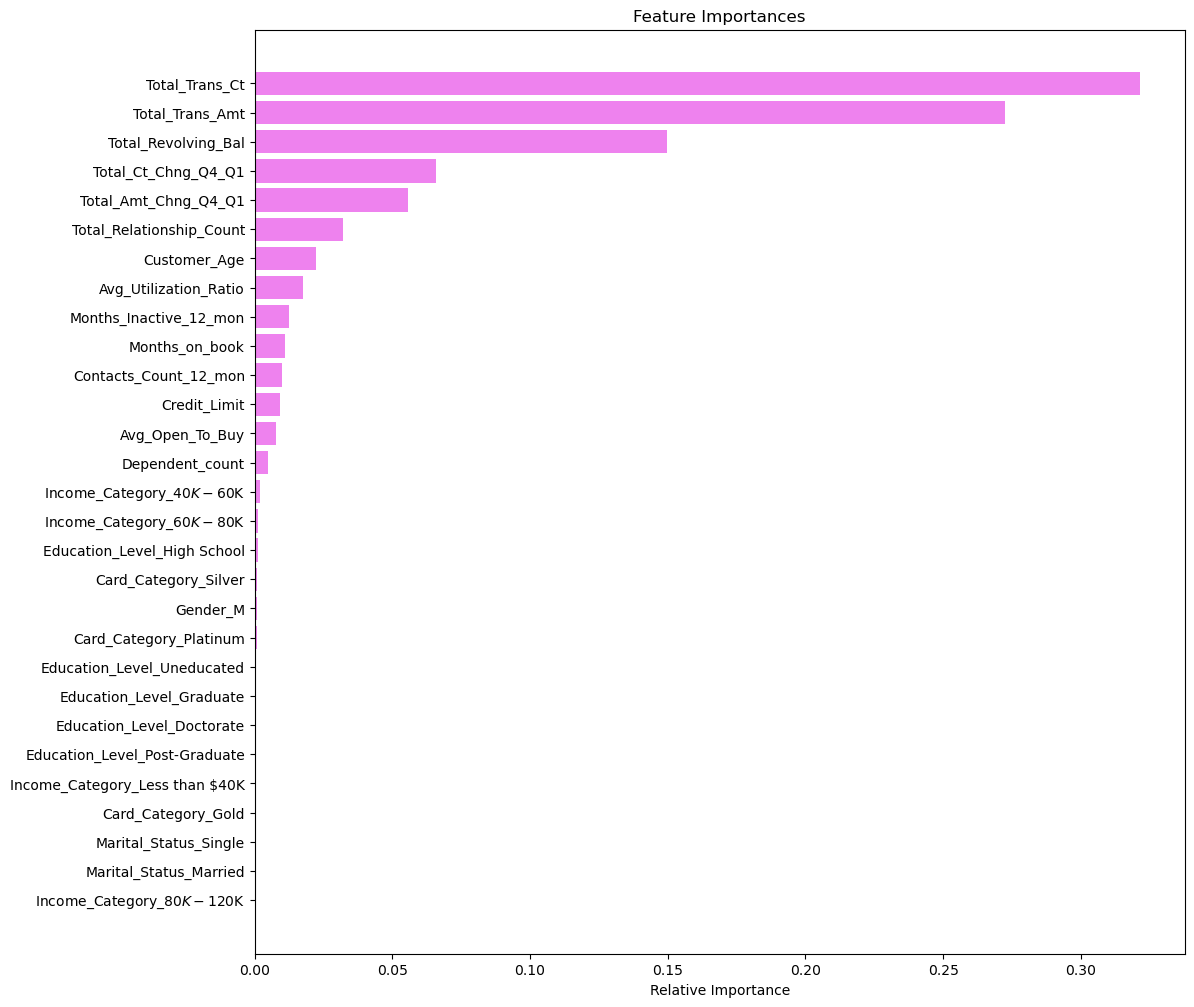

In [140]:
feature_names = X_train.columns
importances = gbm_under_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Observations
- The selected model had a very good recall on the test set: 0.982
- The most important features were total transaction count and amount, total revolving balance, change in Q4 transactions and amount over Q1, total relationship count.

# Business Insights and Conclusions

####Insights
- Total transaction amount has a right skewed distibution. The mean total transaction amount was around \$4k however their were many outliers >\$7K which signals heavy spenders and credit card users. Churned customers had a lower total transaction amount.
- Although the top Education_Level is Graduate, most customers have undergraduate or lesser education. Customers with post-graduate or doctorate education levels curiously have a higher chance of attrition than others.
- Most customers make less than \$40K. Customers with either very high incomes or very low incomes have a higher chance of attrition than others.
- The distribution of Total_Ct_Chng_Q4_Q1 is right-skewed with outliers at both ends. Churned customers had a lower total change in transaction count in Q4 over Q1. This indicates that the churned customers did not use this bank's credit card as much for end-of-year holiday shopping as existing customers.
- Equal no. of customers were retained or churned among those that were fully active last year. Customers on either extremes of inactivity i.e. 1-2 months or 5-6 months are less likely to churn. Customers with 3-4 months of inactivity are likely to churn.
- Avg_open_to_buy and credit_limit have a perfect correlation which makes sense as they go hand in hand. More the credit limit, more room their is for purchases on a credit card.
- Total_Trans_Ct is highly correlated with Total_Trans_Amt which makes sense since both are related to the transactions of the credit card holder.
- Months_on_book is correlated with Customer_Age which makes  sense since older customers would have more time on the bank's books.
- Avg_Utilization_Ratio has a correlation with Total_Revolving_Bal which makes sense since high utilization could indicate higher revolving balance.
- Avg_open_to_buy and avg_utilization_ratio have a moderate negative correlation which makes sense as you use your credit card more, there is less room to spend.
- Credit limit and utilization ratio have a moderate negative correlation which makes sense because if your income increases, increasing your credit limit but your expenses remains fairly the same, the utilization ratio will decrease.
- The selected model - Gradient Boost with undersampled data had a very good recall on the test set: 0.982
- The 5 most important features were total transaction count and amount, total revolving balance, change in Q4 transactions and amount over Q1.

####Conclusions
- Our selected ML model with Gradient Boosting trained on undersampled data, can help the bank proactively predict customer churn, monitor key churn reasons and take steps accordingly to better retain customers.
- Let's take a closer look at the top factors that indicate churn:
1. Total transaction count and amount - Unsurprisingly, the more customers use their credit cards, both no. of times and for higher dollar amounts, more likely are they retained. The bank should therefore offer targeted cashbacks and promotions on frequently used merchant services that incentivizes customers to use their credit cards more.
2. Total revolving balance - Churned customers on average had a much lower, near-0 revolving balance. These customers may have found better credit card offers elsewhere and therefore closed out the card with this bank. The bank should conduct win/loss interviews and surveys to look into the churn reason and take appropriate steps to nurture them back as a customer.
3. Change in Q4 transactions and amount over Q1 - Churned cusotmers spent much less and used their cards much less in Q4 over Q1, compared to retained customers. The bank should offer cashbacks and promotions to at-risk customers specifically during the holiday period so this bank's card becomes the preferred choice of card for shopping.
4. Total relationship count - More products used with the bank meant more retention. The bank should investigate what an ideal customer product usage and upsell journey looks like and deploy that for nurturing customers with 1 or 2 products.
- A large part of the customer base is young and female. The bank should look at offering discounts and cashbacks tied to merchant serives and products that appeal to the young female demographic.
- The bank should look at improving the value perception and realization of the Platinum tier card as this saw higher churn than other card tiers. This could include branding and upsell marketing campaigns.
- More contact with the bank meant more churn risk. This could mean dissatisfaction with the bank's services and should be investigated.

***